# MEDIDA SAMPLE2 - CHIP1 DE 4 RESSONADORES

In [76]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd
import csv
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from collections import Counter
from scipy import interpolate
from scipy.optimize import leastsq
from scipy import stats
import copy
import math
from io import StringIO
from MyFunctions import * # MyModule
from scipy.optimize import curve_fit


# FULL CHIP

In [77]:
S21_freq_1to10GHz, S21_1to10GHz, fase_1to10GHz = ImportS2P("C:/Users/molin/medidas mK/(sample2) Medidas mK CHIP1 2024_06_26/S21_span1_10GHz_-5dBm.csv"\
                                       ,Delimiter = " ", Cols = (0,1,2), Skip_head=1)

In [78]:
S21_freq_1to10GHz_simu, S21_1to10GHz_simu = ImportS3P("C:/Users/molin/medidas mK/(sample2) Medidas mK CHIP1 2024_06_26/S21_chip1_fullchip_simu.csv"\
                                       ,Delimiter = ",", Cols = (0,1,2), Skip_head=1)

In [79]:
S21_freq_1to3GHz_simu, S21_1to3GHz_simu = ImportS3P("C:/Users/molin/medidas mK/(sample2) Medidas mK CHIP1 2024_06_26/S21_chip1_fullchip_simu_1-3GHz.csv"\
                                       ,Delimiter = ",", Cols = (0,1,2), Skip_head=1)

In [80]:
S21_freq_3to5GHz_simu, S21_3to5GHz_simu = ImportS3P("C:/Users/molin/medidas mK/(sample2) Medidas mK CHIP1 2024_06_26/S21_chip1_fullchip_simu_3-5GHz.csv"\
                                       ,Delimiter = ",", Cols = (0,1,2), Skip_head=1)

In [81]:
S21_freq_5to7GHz_simu, S21_5to7GHz_simu = ImportS3P("C:/Users/molin/medidas mK/(sample2) Medidas mK CHIP1 2024_06_26/S21_chip1_fullchip_simu_5-7GHz.csv"\
                                       ,Delimiter = ",", Cols = (0,1,2), Skip_head=1)

In [82]:
S21_freq_7to9GHz_simu, S21_7to9GHz_simu = ImportS3P("C:/Users/molin/medidas mK/(sample2) Medidas mK CHIP1 2024_06_26/S21_chip1_fullchip_simu_7-9GHz.csv"\
                                       ,Delimiter = ",", Cols = (0,1,2), Skip_head=1)

In [83]:
print(S21_freq_1to10GHz, S21_1to10GHz, fase_1to10GHz)

[1.00000000e+09 1.00090009e+09 1.00180018e+09 ... 9.99819982e+09
 9.99909991e+09 1.00000000e+10] [-21.18985726 -21.15366175 -21.18953761 ...  -9.67884335  -9.62049964
  -9.55575422] [-121.72509308 -142.82197714 -164.00442397 ... -111.98924231 -135.38366713
 -158.70543004]


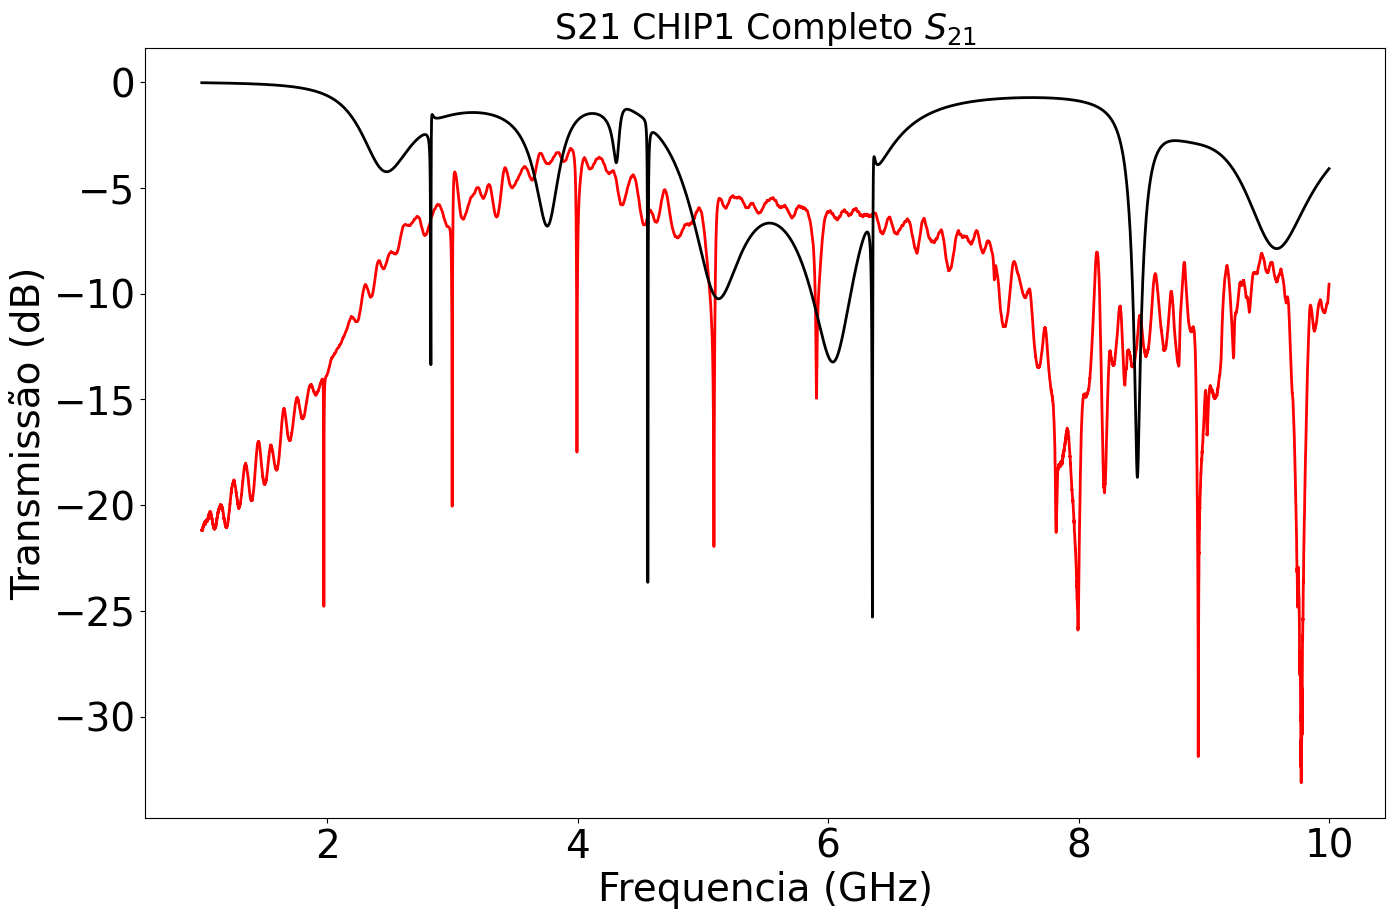

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(16,10))
ax.plot((S21_freq_1to10GHz)*(10e-10), S21_1to10GHz, linewidth=2, color='red')
ax.plot((S21_freq_1to10GHz_simu), S21_1to10GHz_simu, linewidth=2, color='black')
ax.set_title("S21 CHIP1 Completo $S_{21}$", fontsize=25)
ax.set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax.set_ylabel(r"Transmissão (dB)", fontsize=28)
ax.tick_params(axis='both', which='major', labelsize=28)
#ax.set_xlim(3.9,5.1)

In [85]:
S21_simu_frq_res1=S21_freq_1to3GHz_simu[17000:19000]
S21_simu_frq_res2=S21_freq_3to5GHz_simu[14000:18000]
S21_simu_frq_res3=S21_freq_5to7GHz_simu[13000:15000]
S21_simu_frq_res4=S21_freq_7to9GHz_simu[11500:17500]

S21_simu_res1=S21_1to3GHz_simu[17000:19000]
S21_simu_res2=S21_3to5GHz_simu[14000:18000]
S21_simu_res3=S21_5to7GHz_simu[13000:15000]
S21_simu_res4=S21_7to9GHz_simu[11500:17500]

In [86]:
print(len(S21_freq_1to3GHz_simu))

20000


(8.2, 9.1)

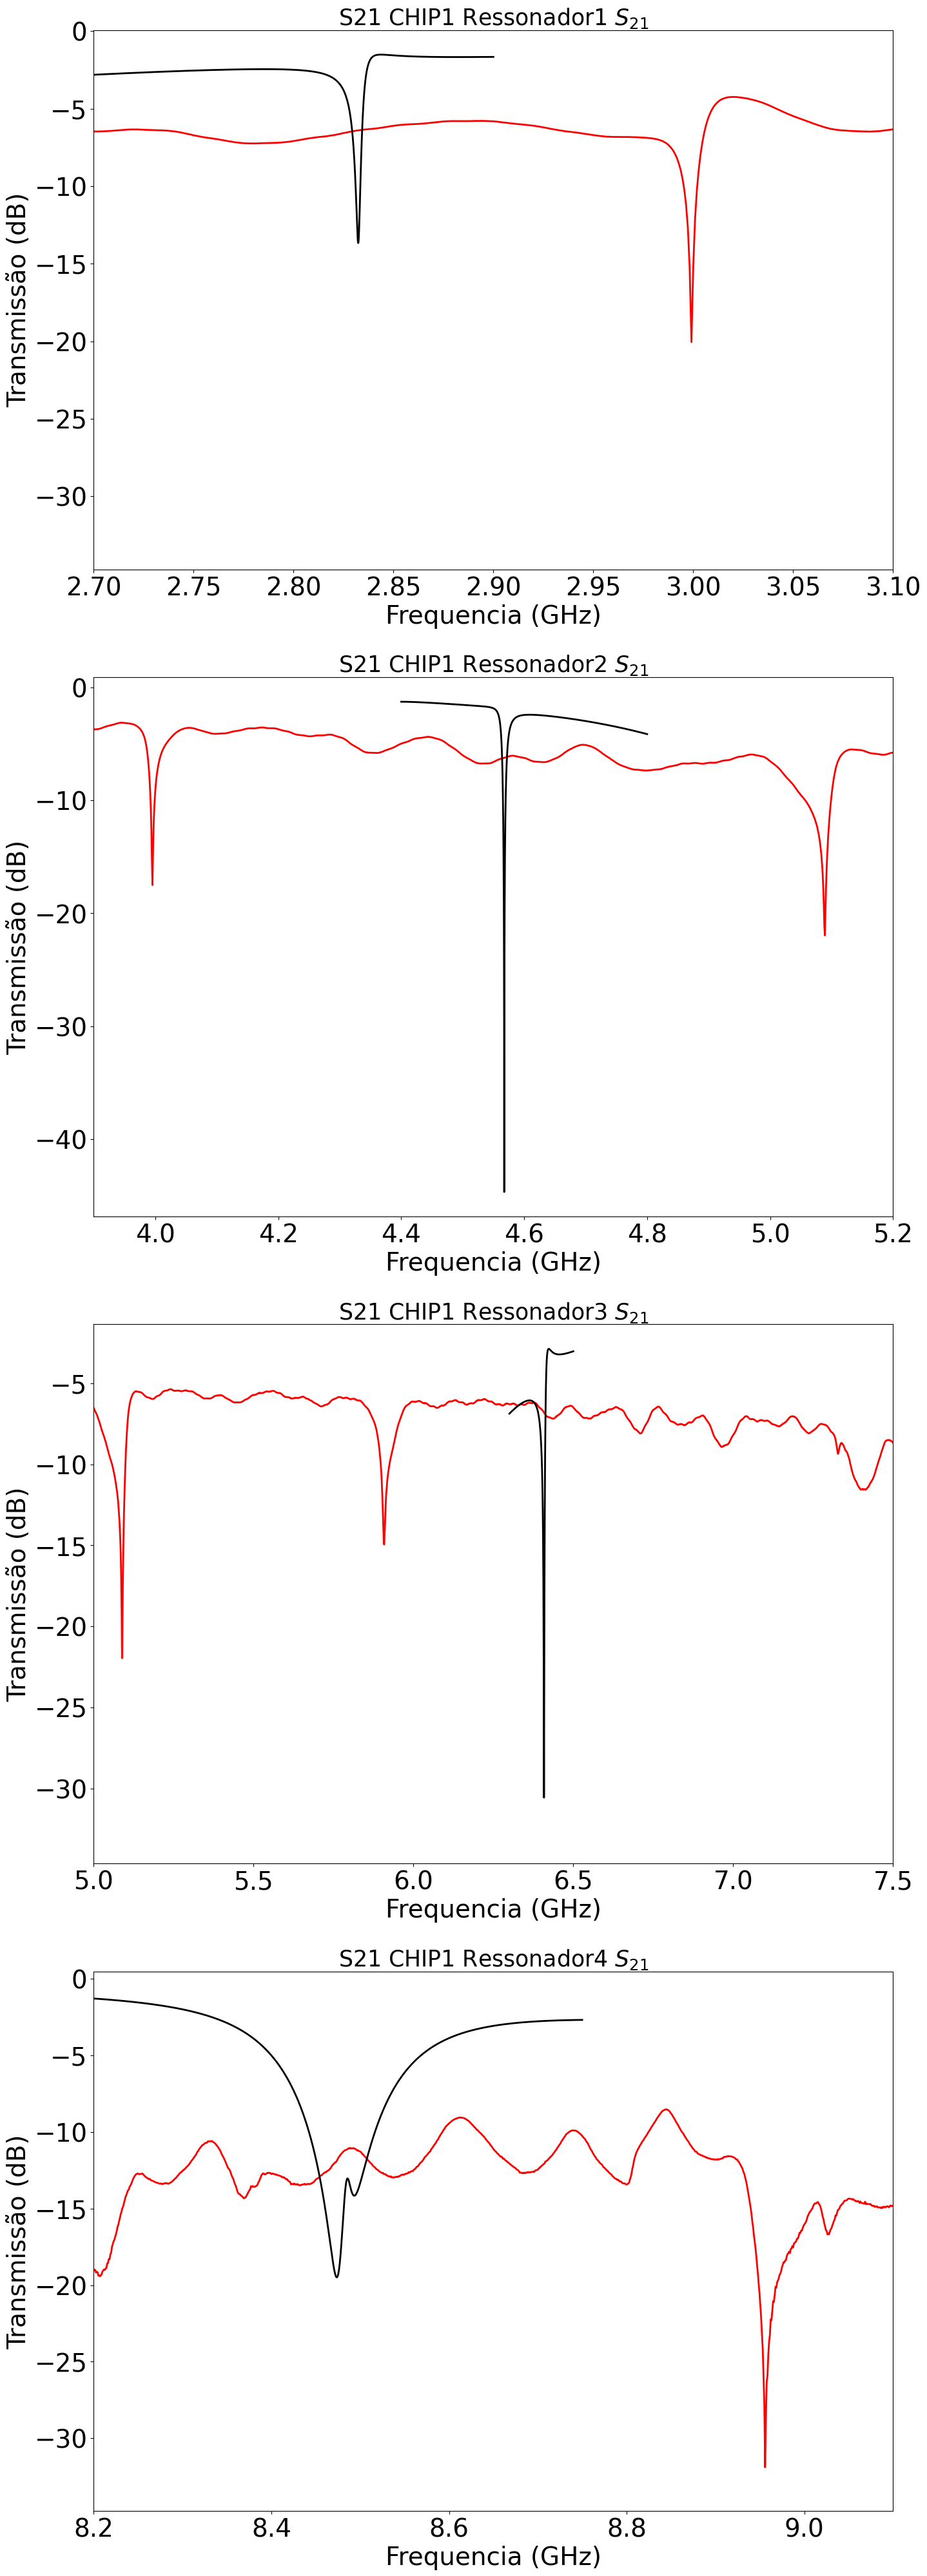

In [87]:
fig, ax = plt.subplots(4, 1, figsize=(16,50))
ax[0].plot(S21_freq_1to10GHz*(10e-10), S21_1to10GHz, linewidth=2, color='red')
ax[0].plot(S21_simu_frq_res1,S21_simu_res1,linewidth=2, color='black')
ax[0].set_title("S21 CHIP1 Ressonador1 $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (dB)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(2.7,3.1)

ax[1].plot(S21_freq_1to10GHz*(10e-10), S21_1to10GHz, linewidth=2, color='red')
ax[1].plot(S21_simu_frq_res2,S21_simu_res2,linewidth=2, color='black')
ax[1].set_title("S21 CHIP1 Ressonador2 $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Transmissão (dB)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=28)
ax[1].set_xlim(3.9,5.2)

ax[2].plot(S21_freq_1to10GHz*(10e-10), S21_1to10GHz, linewidth=2, color='red')
ax[2].plot(S21_simu_frq_res3,S21_simu_res3,linewidth=2, color='black')
ax[2].set_title("S21 CHIP1 Ressonador3 $S_{21}$", fontsize=25)
ax[2].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[2].set_ylabel(r"Transmissão (dB)", fontsize=28)
ax[2].tick_params(axis='both', which='major', labelsize=28)
ax[2].set_xlim(5,7.5)

ax[3].plot(S21_freq_1to10GHz*(10e-10), S21_1to10GHz, linewidth=2, color='red')
ax[3].plot(S21_simu_frq_res4,S21_simu_res4,linewidth=2, color='black')
ax[3].set_title("S21 CHIP1 Ressonador4 $S_{21}$", fontsize=25)
ax[3].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[3].set_ylabel(r"Transmissão (dB)", fontsize=28)
ax[3].tick_params(axis='both', which='major', labelsize=28)
ax[3].set_xlim(8.2,9.1)

# FUNDO ELSA

In [88]:
#importando o fundo de 0 a 18 GHz
fundo_freq_span18GHz, fundo_amp_span18GHz, fundo_fase_span18GHz = ImportS2P("C:/Users/molin/medidas mK/Elsa Fundo/base_abaixo7mk_512avg_10mK_10001points_0db_linha3&4_span18GHz.csv"\
                                       ,Delimiter = ";", Cols = (0,1,2), Skip_head=0)
#importando o fundo de 4 a 6 GHz
fundo_freq_span2GHz, fundo_amp_span2GHz, fundo_fase_span2GHz = ImportS2P("C:/Users/molin/medidas mK/Elsa Fundo/base_abaixo7mk_512avg_10mK_10001points_0db_linha3&4_span2GHz.csv"\
                                       ,Delimiter = ";", Cols = (0,1,2), Skip_head=0)
#importando o fundo de 4 a 10 GHz
fundo_freq_span6GHz, fundo_amp_span6GHz, fundo_fase_span6GHz = ImportS2P("C:/Users/molin/medidas mK/Elsa Fundo/base_abaixo7mk_512avg_10mK_10001points_0db_linha3&4_span6GHz.csv"\
                                       ,Delimiter = ";", Cols = (0,1,2), Skip_head=0)


# Pico 1 - 1,9 GHz

In [89]:
S21_freq_p1, S21_p1, fase_p1 = ImportS2P("C:/Users/molin/medidas mK/(sample2) Medidas mK CHIP1 2024_06_26/S21_span1.96_2GHz_-5dBm.csv"\
                                       ,Delimiter = " ", Cols = (0,1,2), Skip_head=1)

(1960000000.0, 2000000000.0)

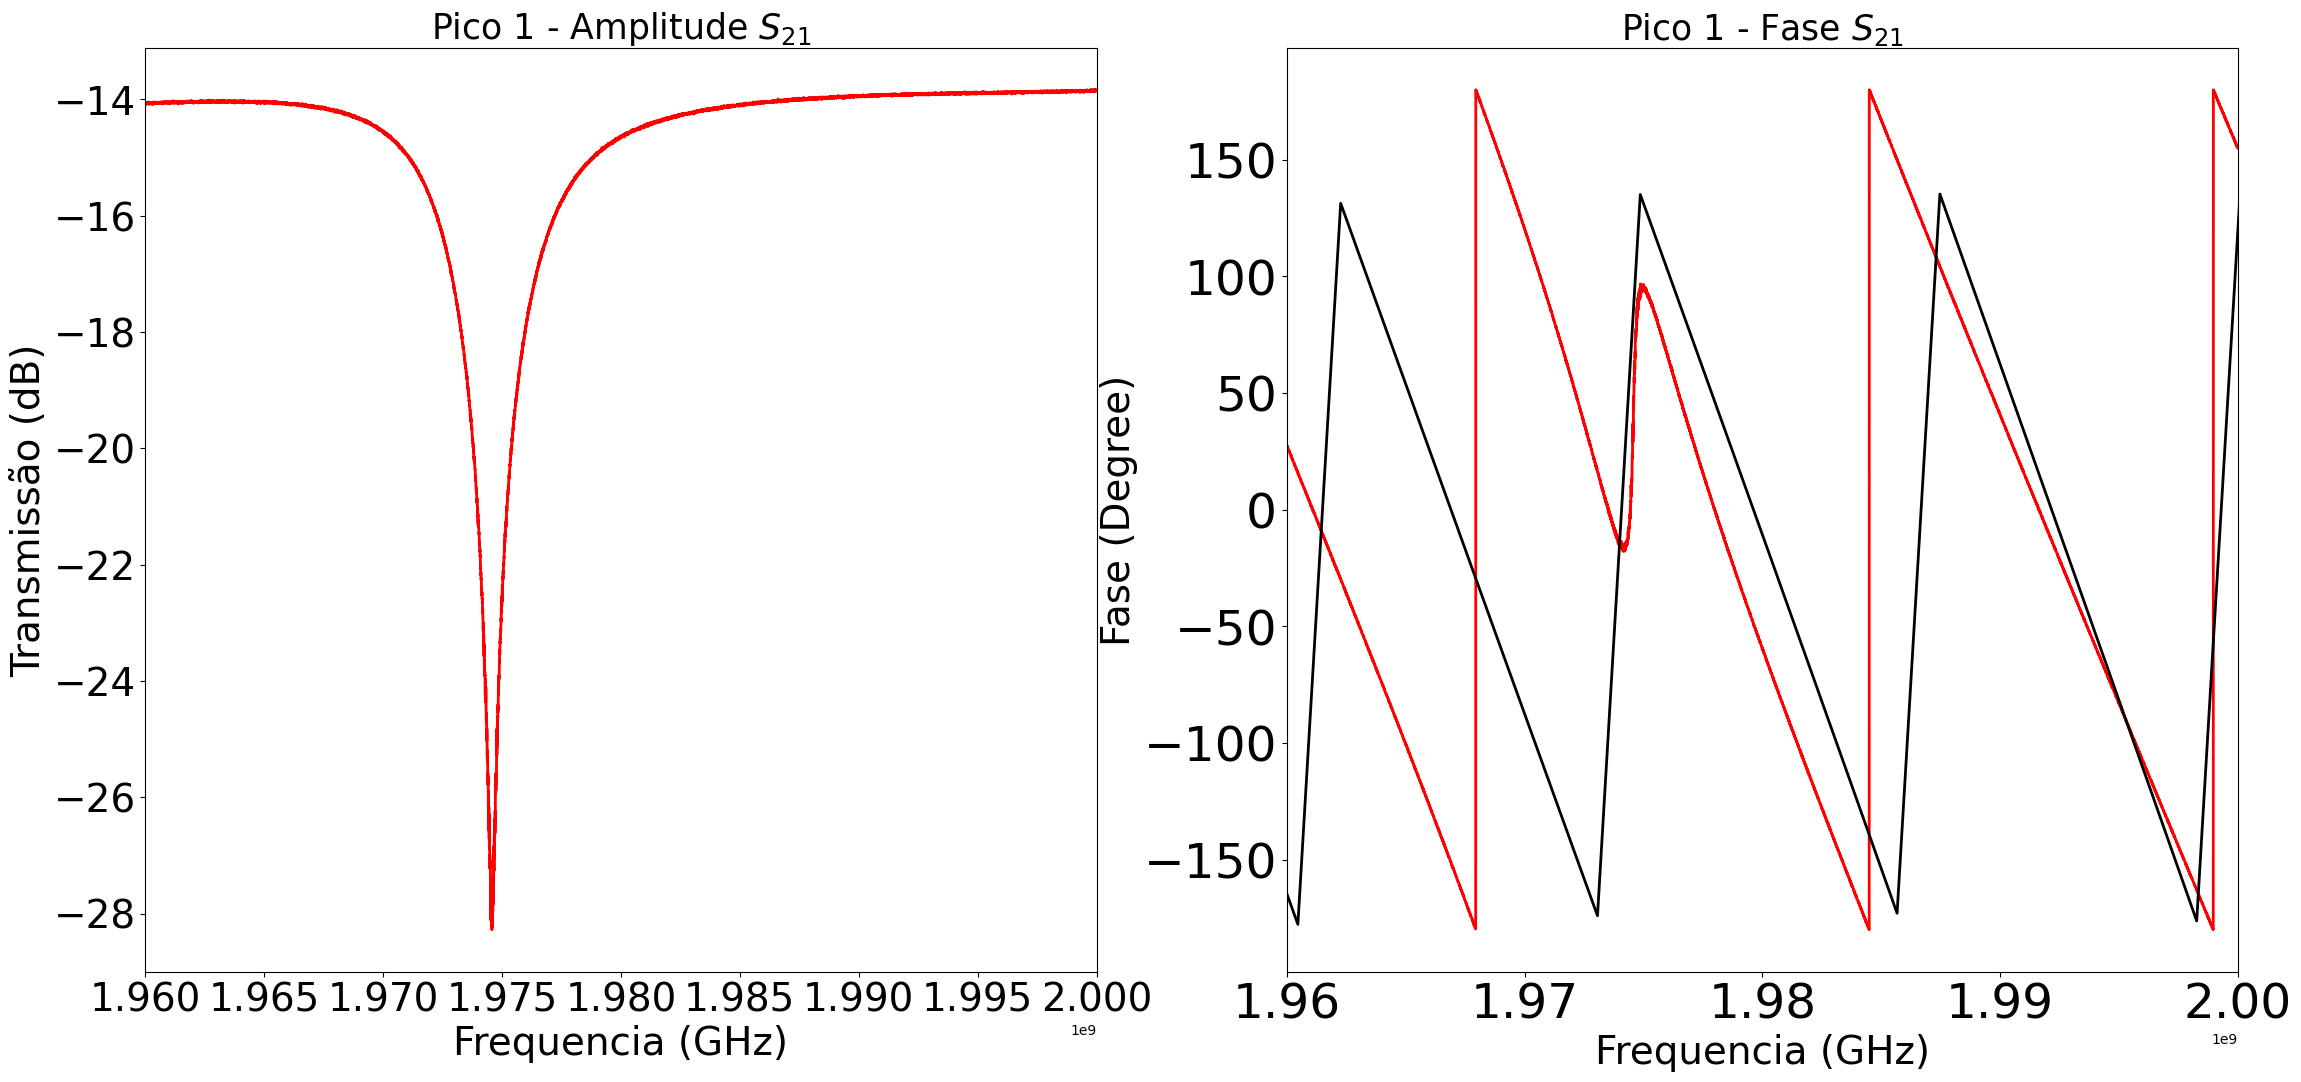

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p1, S21_p1, linewidth=2, color='red')
#ax[0].plot(fundo_freq_span18GHz, fundo_amp_span18GHz, linewidth=2, color='black')
ax[0].set_title("Pico 1 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (dB)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(1.96e9,2e9)

ax[1].plot(S21_freq_p1, fase_p1, linewidth=2, color='red')
ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz, linewidth=2, color='black')
ax[1].set_title("Pico 1 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (Degree)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(1.96e9,2e9)

In [91]:
#dB to Volts
log20=10*log10(20)
S21_p1_l=pow(10,(S21_p1-log20)/20)
fundo_amp_span18GHz_l=pow(10,(fundo_amp_span18GHz-log20)/20)

#Unwrap Phase
fase_p1_l=unwrap(radians(fase_p1))
fundo_fase_span18GHz_l=unwrap(radians(fundo_fase_span18GHz))

(-50.0, 50.0)

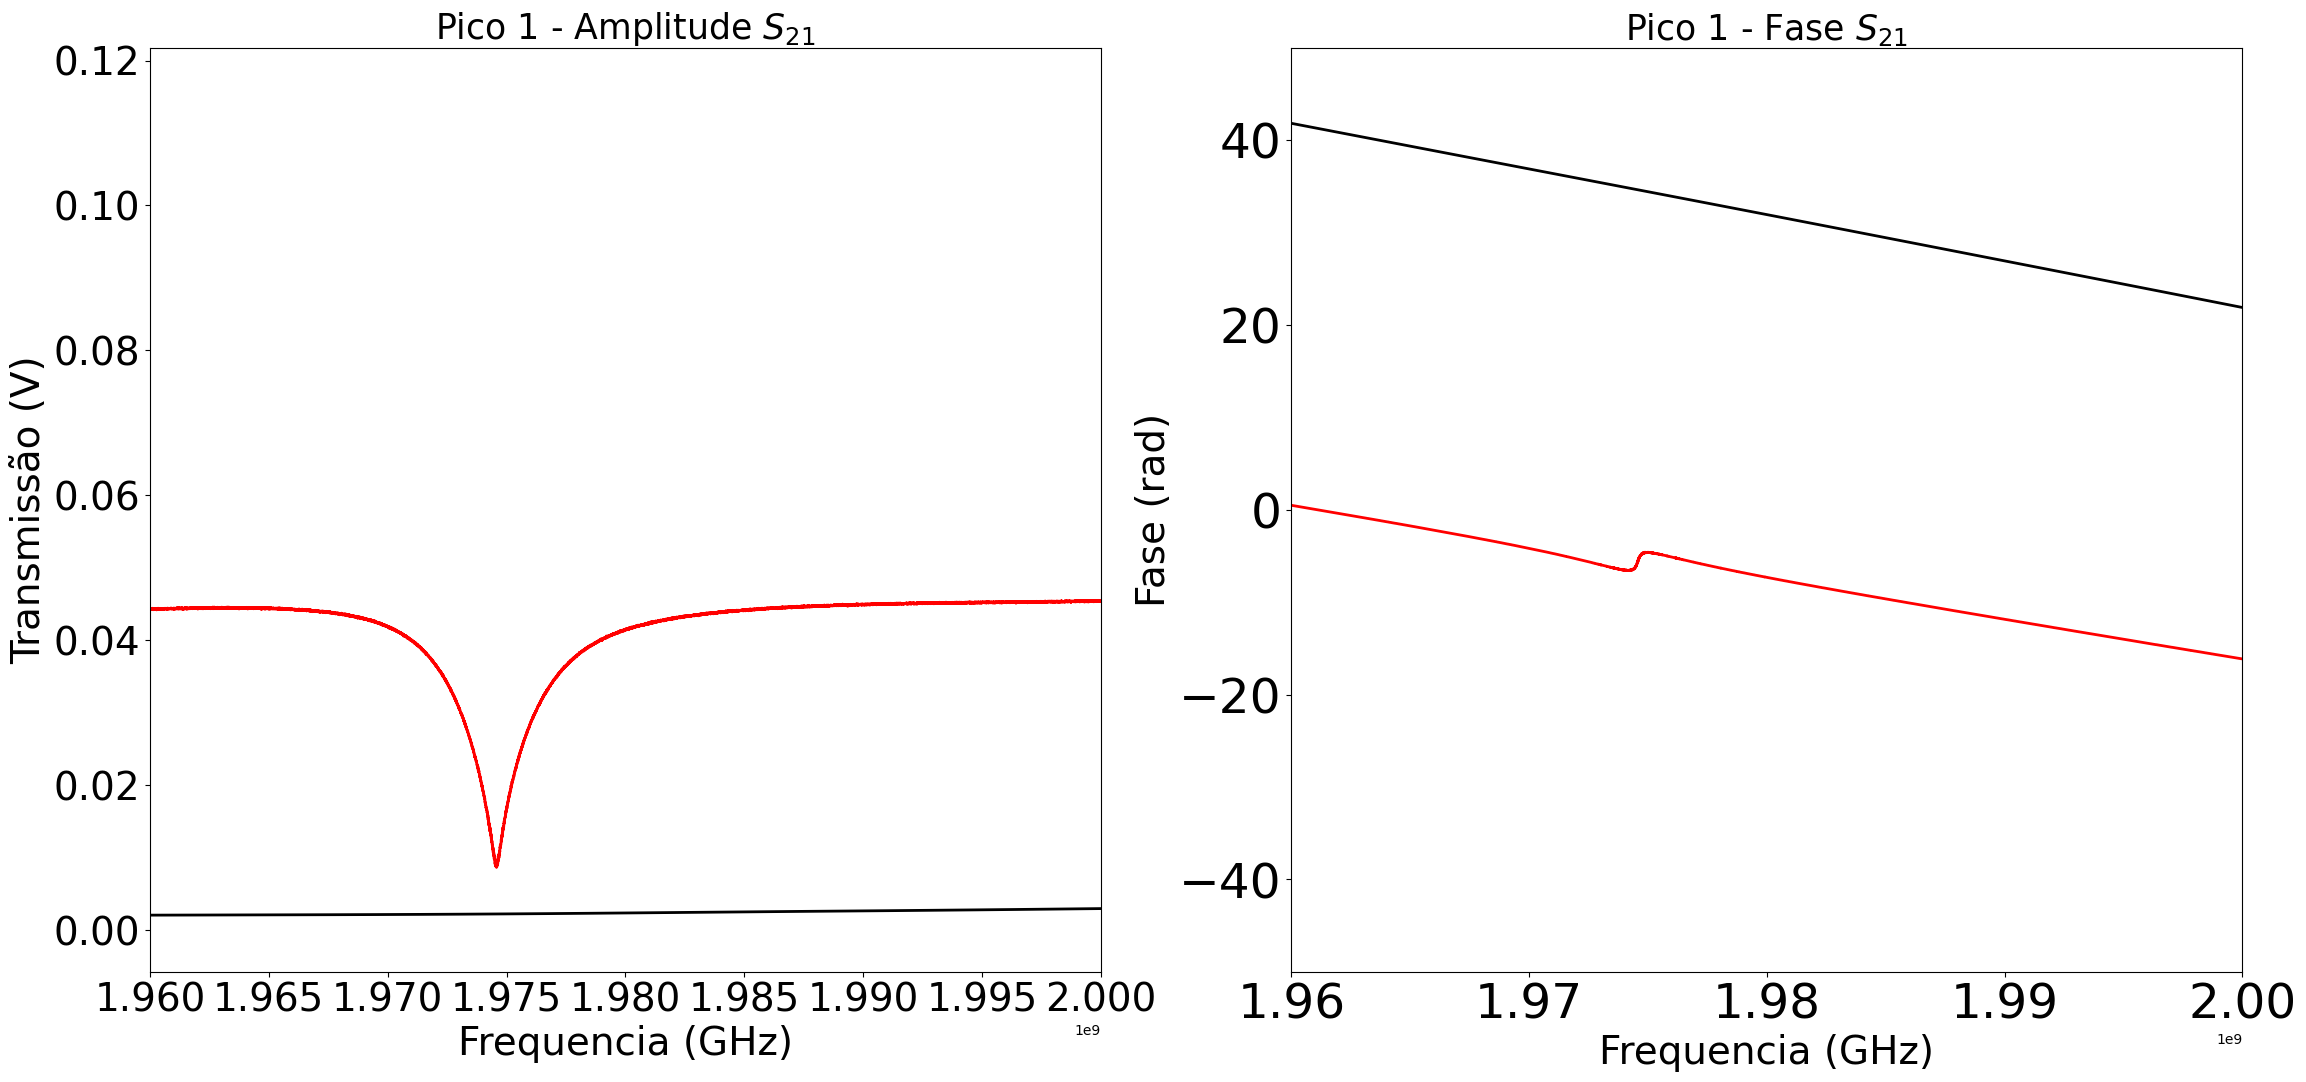

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p1, S21_p1_l, linewidth=2, color='red')
ax[0].plot(fundo_freq_span18GHz, fundo_amp_span18GHz_l, linewidth=2, color='black')
ax[0].set_title("Pico 1 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (V)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(1.96e9,2e9)

ax[1].plot(S21_freq_p1, fase_p1_l, linewidth=2, color='red')
ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz_l+1050, linewidth=2, color='black')
ax[1].set_title("Pico 1 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (rad)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(1.96e9,2e9)
ax[1].set_ylim(-50,50)

In [93]:
#interpolação
fundo_amp_span18GHz_l_fit=interp1d(fundo_freq_span18GHz,fundo_amp_span18GHz_l, kind='cubic')
fundo_fase_span18GHz_l_fit=interp1d(fundo_freq_span18GHz,fundo_fase_span18GHz_l, kind='cubic')

## CORREÇÃO DOS DADOS

In [94]:
fase_p1_l_fit=wrap1(fundo_fase_span18GHz_l_fit(S21_freq_p1)-fase_p1_l)

(-5.0, 5.0)

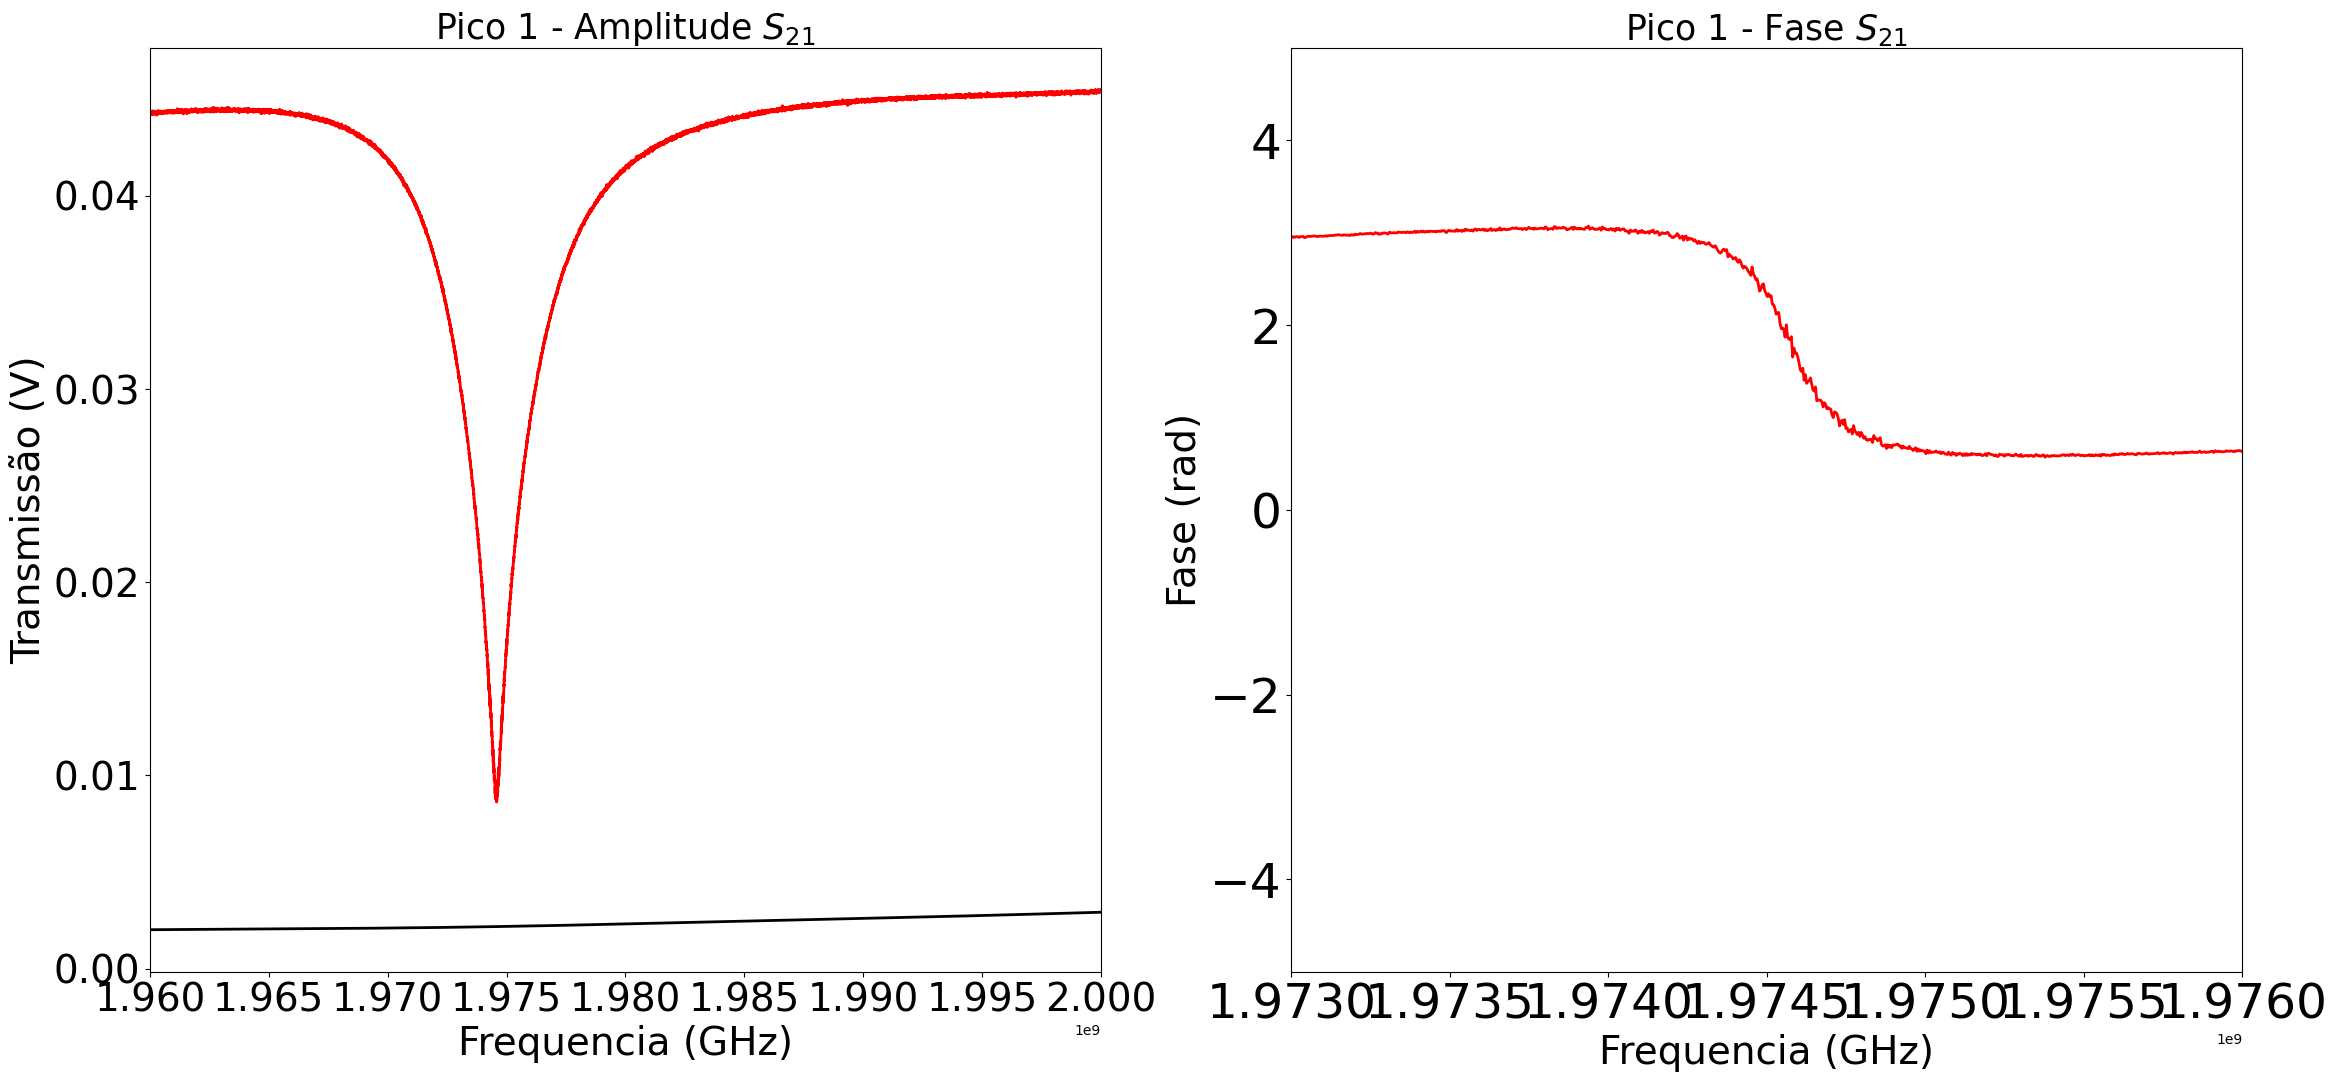

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p1, S21_p1_l, linewidth=2, color='red')
ax[0].plot(S21_freq_p1, fundo_amp_span18GHz_l_fit(S21_freq_p1), linewidth=2, color='black')
ax[0].set_title("Pico 1 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (V)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(1.96e9,2e9)

ax[1].plot(S21_freq_p1, fase_p1_l_fit, linewidth=2, color='red')
#ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz_l+1050, linewidth=2, color='black')
ax[1].set_title("Pico 1 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (rad)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(1.973e9,1.976e9)
ax[1].set_ylim(-5,5)

In [96]:
#NORMALIZAR DADOS
S21_p1_l_norm=S21_p1_l/fundo_amp_span18GHz_l_fit(S21_freq_p1)

(-10.0, 10.0)

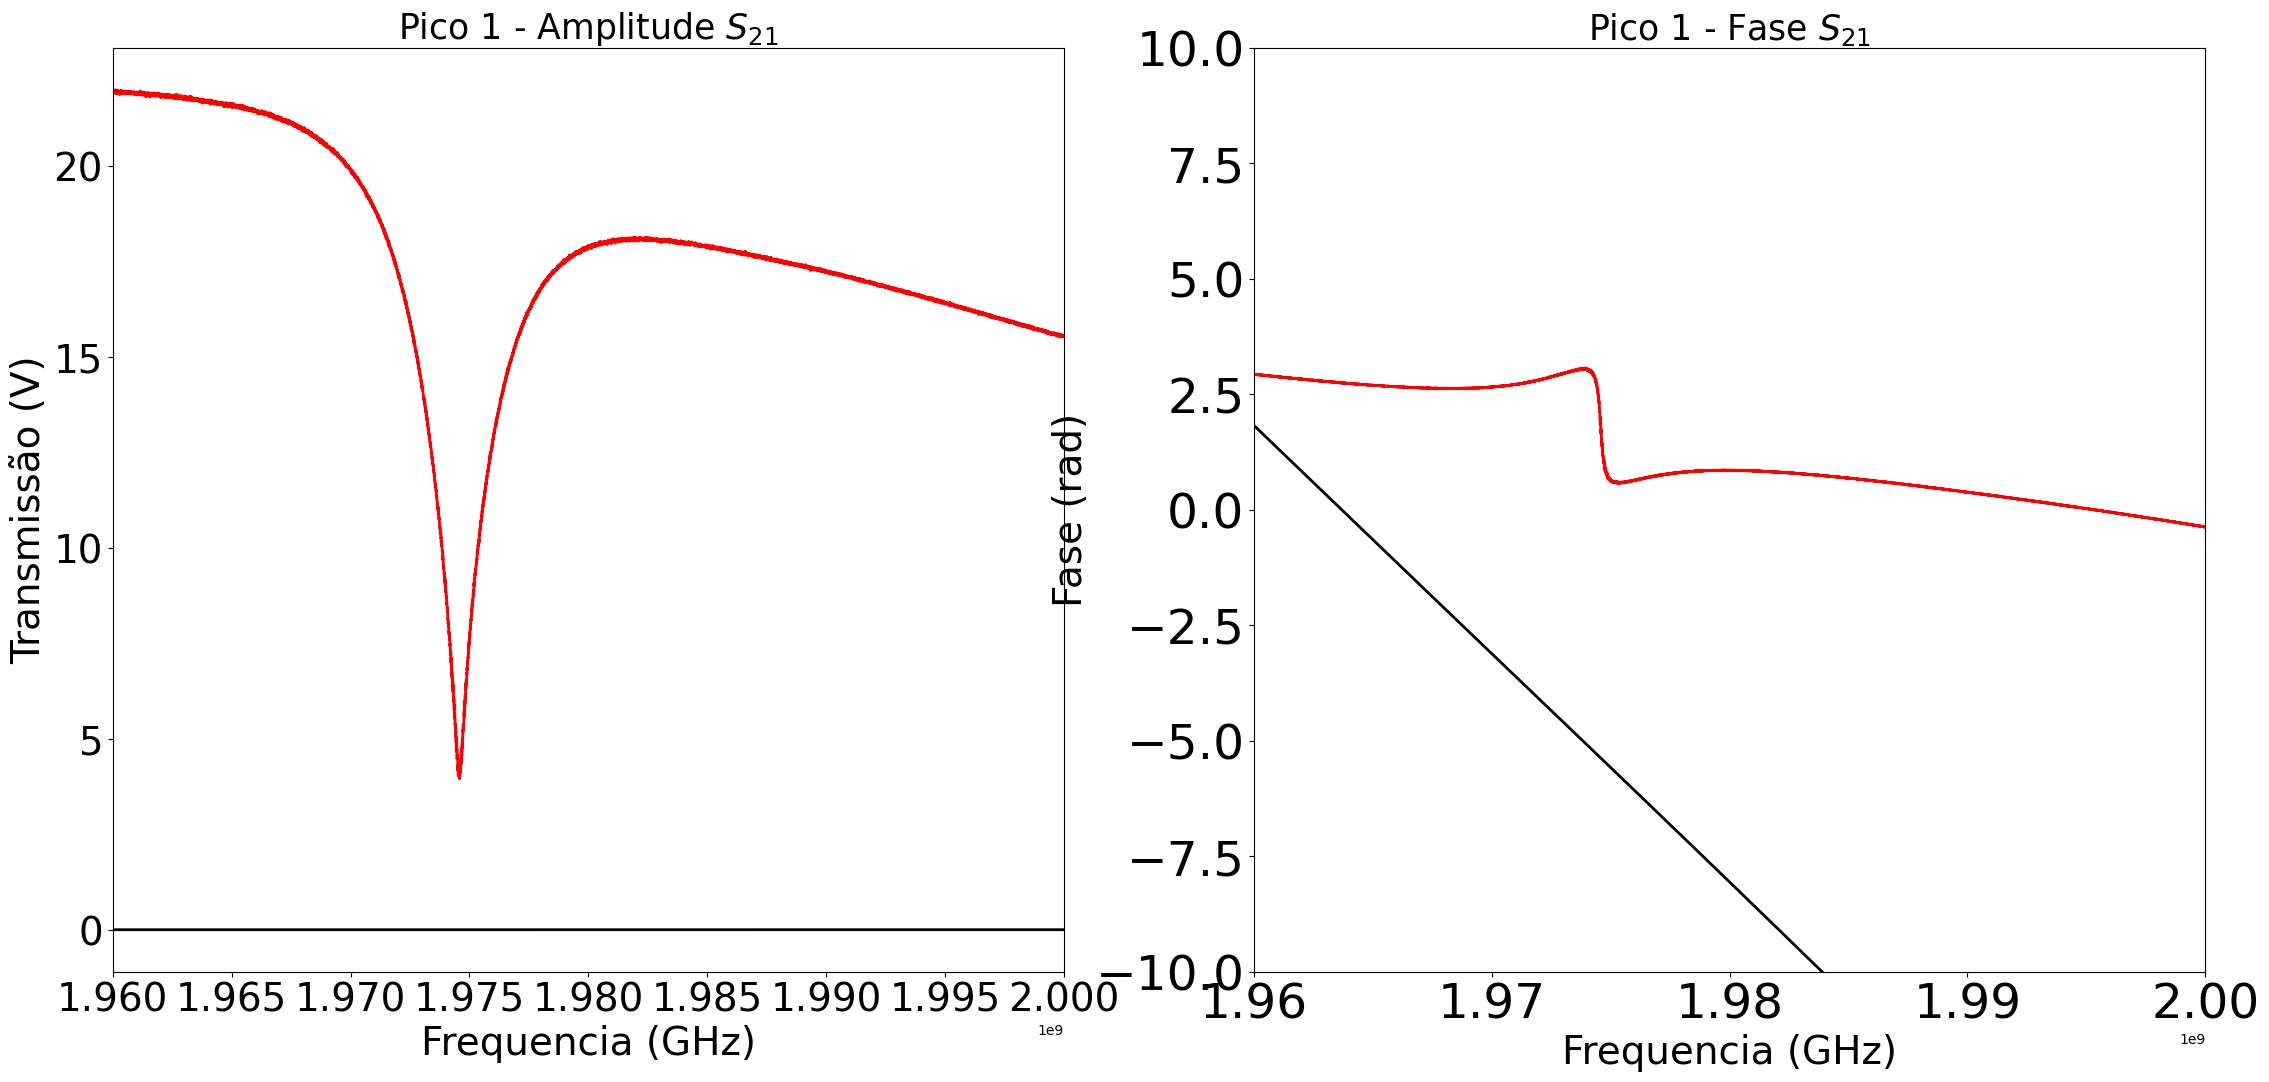

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p1, S21_p1_l_norm, linewidth=2, color='red')
ax[0].plot(S21_freq_p1, fundo_amp_span18GHz_l_fit(S21_freq_p1), linewidth=2, color='black')
ax[0].set_title("Pico 1 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (V)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(S21_freq_p1[0],S21_freq_p1[-1])

ax[1].plot(S21_freq_p1, fase_p1_l_fit, linewidth=2, color='red')
ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz_l+1010, linewidth=2, color='black')
ax[1].set_title("Pico 1 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (rad)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(S21_freq_p1[0],S21_freq_p1[-1])
ax[1].set_ylim(-10,10)

(1970000000.0, 1980000000.0)

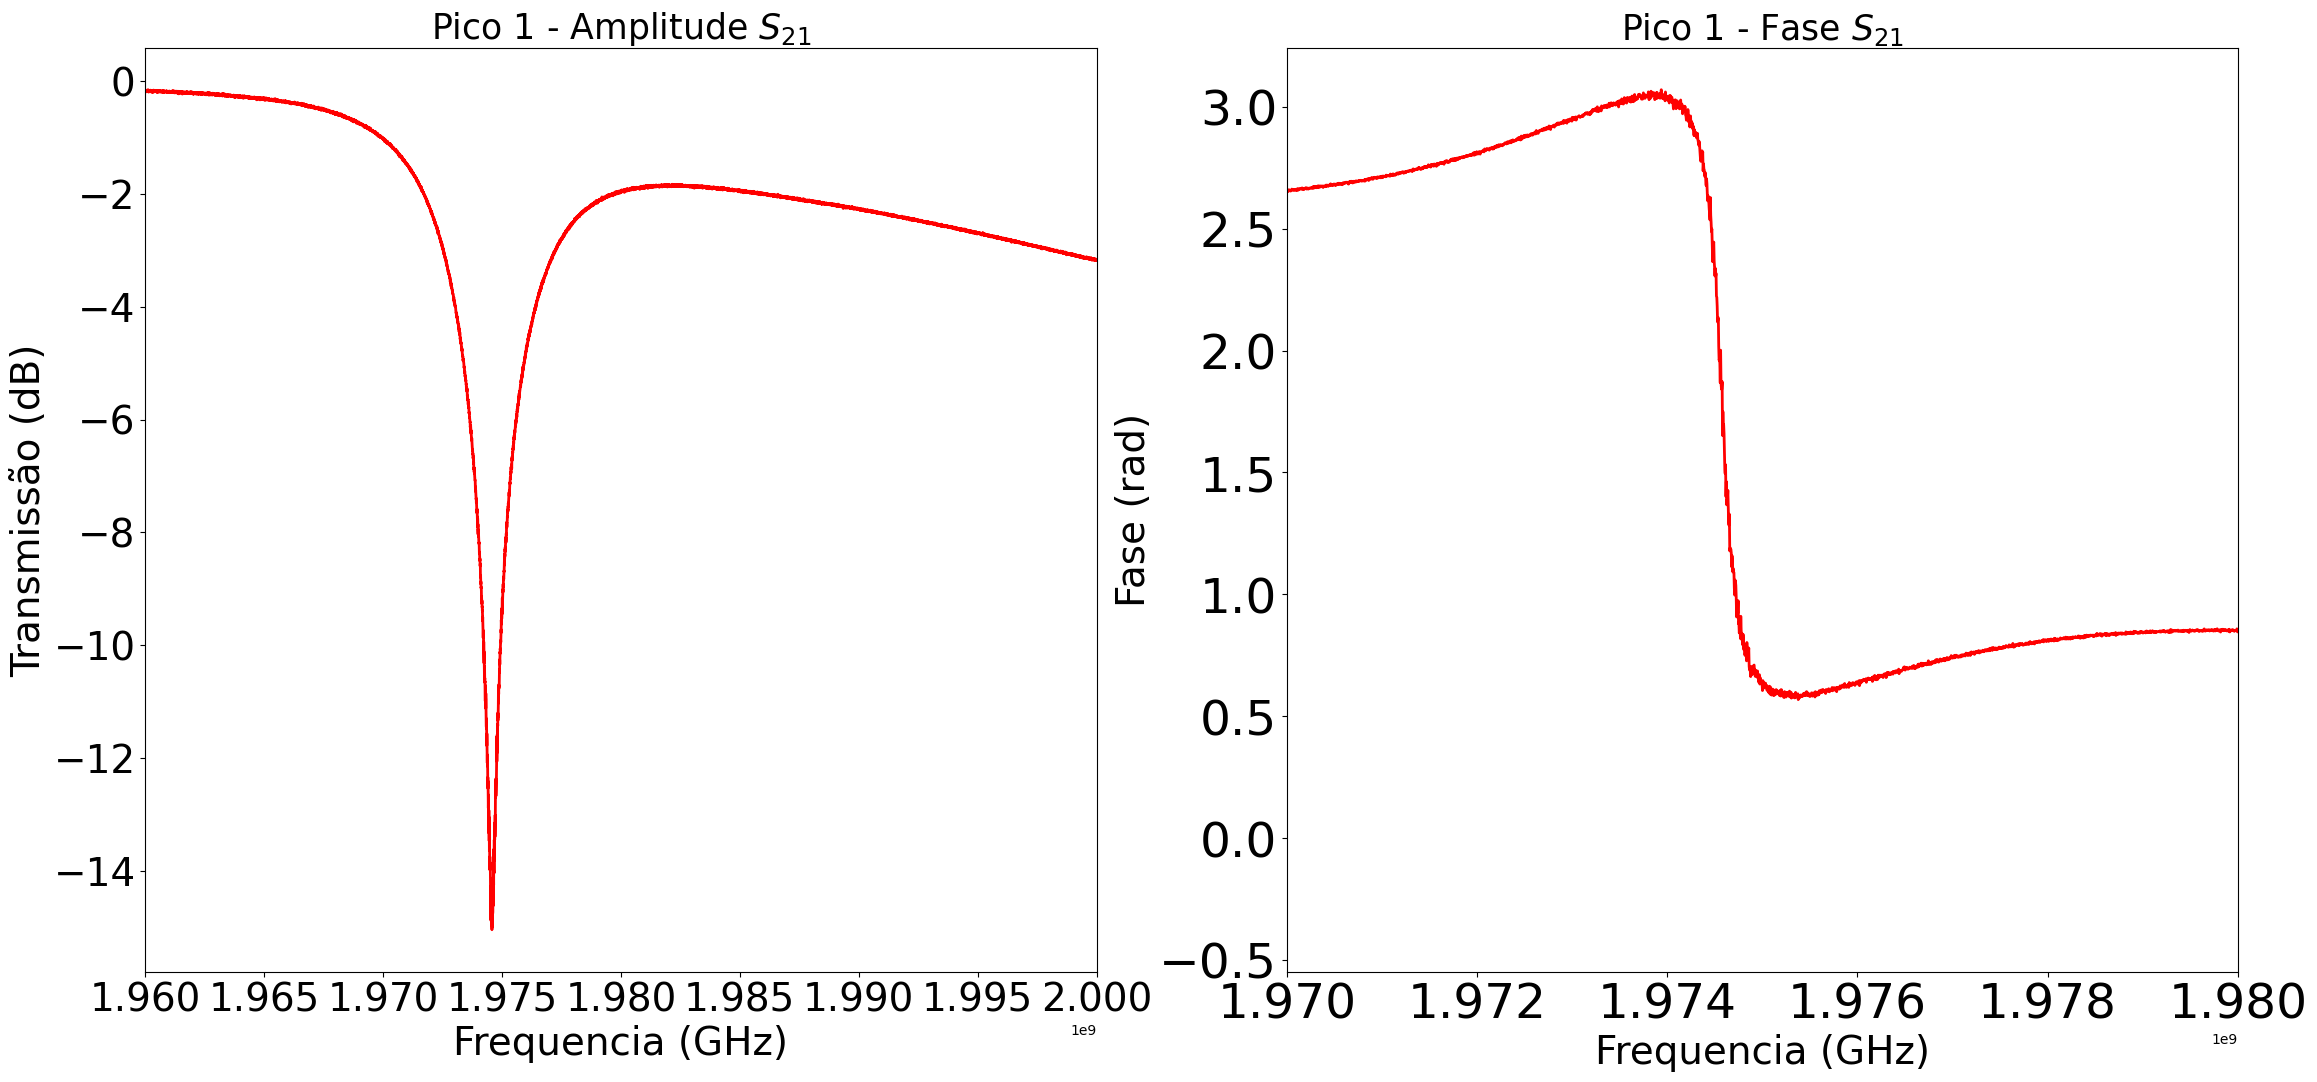

In [98]:
# plot em dB
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p1, (20*(log10(S21_p1_l_norm)))-27, linewidth=2, color='red')
#ax[0].plot(S21_freq_p1, fundo_amp_span18GHz_l_fit(S21_freq_p1), linewidth=2, color='black')
ax[0].set_title("Pico 1 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (dB)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(S21_freq_p1[0],S21_freq_p1[-1])

ax[1].plot(S21_freq_p1, fase_p1_l_fit, linewidth=2, color='red')
#ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz_l+1010, linewidth=2, color='black')
ax[1].set_title("Pico 1 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (rad)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(1.97e9,1.98e9)
#ax[1].set_ylim(-10,10)

In [99]:
#Re/Im Fit e Rotação dos dados
# Method to calculate the center and radius of points in a circuference
from scipy      import  odr

# Import Data
X0 = S21_freq_p1
Y0 = S21_p1_l_norm*(exp(1j*fase_p1_l_fit))*(np.exp(1j*np.pi/2))

x = Y0.real
y = Y0.imag

x_m = mean(x)
y_m = mean(y)

def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return sqrt((x-xc)**2 + (y-yc)**2)

x_m = mean(x)
y_m = mean(y)


# method_3 = "odr"

def f_3(beta, x):
    """ implicit definition of the circle """
    return (x[0]-beta[0])**2 + (x[1]-beta[1])**2 -beta[2]**2

# initial guess for parameters
R_m = calc_R(x_m, y_m).mean()
beta0 = [ x_m, y_m, R_m]

d = sqrt((x-x_m)**2+(y-y_m)**2)
error = R_m/sqrt(mean((d-R_m)**2))
# print(error)


# for implicit function :
#       data.x contains both coordinates of the points (data.x = [x, y])
#       data.y is the dimensionality of the response
lsc_data  = odr.Data(row_stack([x, y]),y=1)#,we=1/error,wd=error)
lsc_model = odr.Model(f_3, implicit=True)
lsc_odr   = odr.ODR(lsc_data, lsc_model, beta0)
lsc_out   = lsc_odr.run()

xc_3, yc_3, R_3 = lsc_out.beta
Ri_3 = calc_R(xc_3, yc_3)
residu_3 = sum((Ri_3 - R_3)**2)
lsc_out.beta

array([-5.12988593, -1.64832445, 16.67102161])

-5.129885927593926 -1.6483244503661167 16.671021613640267
-2.830694635273553


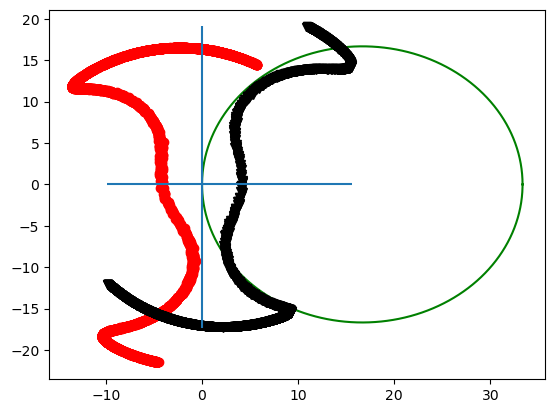

In [100]:
x0 = lsc_out.beta[0]
y0 = lsc_out.beta[1]
r0 = lsc_out.beta[2]


a = linspace(0,2*pi,1000)
x = r0 + r0 *cos(a)
y =  r0 *sin(a)
print(x0,y0,r0)

plt.plot(x,y,'g-')
plt.plot(Y0.real,Y0.imag,'ro')
Angle = arctan2(y0,x0)
print(Angle)
Y1=(Y0-complex(x0,y0))*exp(-1j*Angle)+sqrt(x0**2+y0**2)
#Y1=(Y0)*exp(1j*Angle)

plt.plot(Y1.real,Y1.imag,'kv')
#plt.plot(Fit.real,Fit.imag,'go')
plt.hlines(0,min(Y1.real),max(Y1.real))
plt.vlines(0,min(Y1.imag),max(Y1.imag))

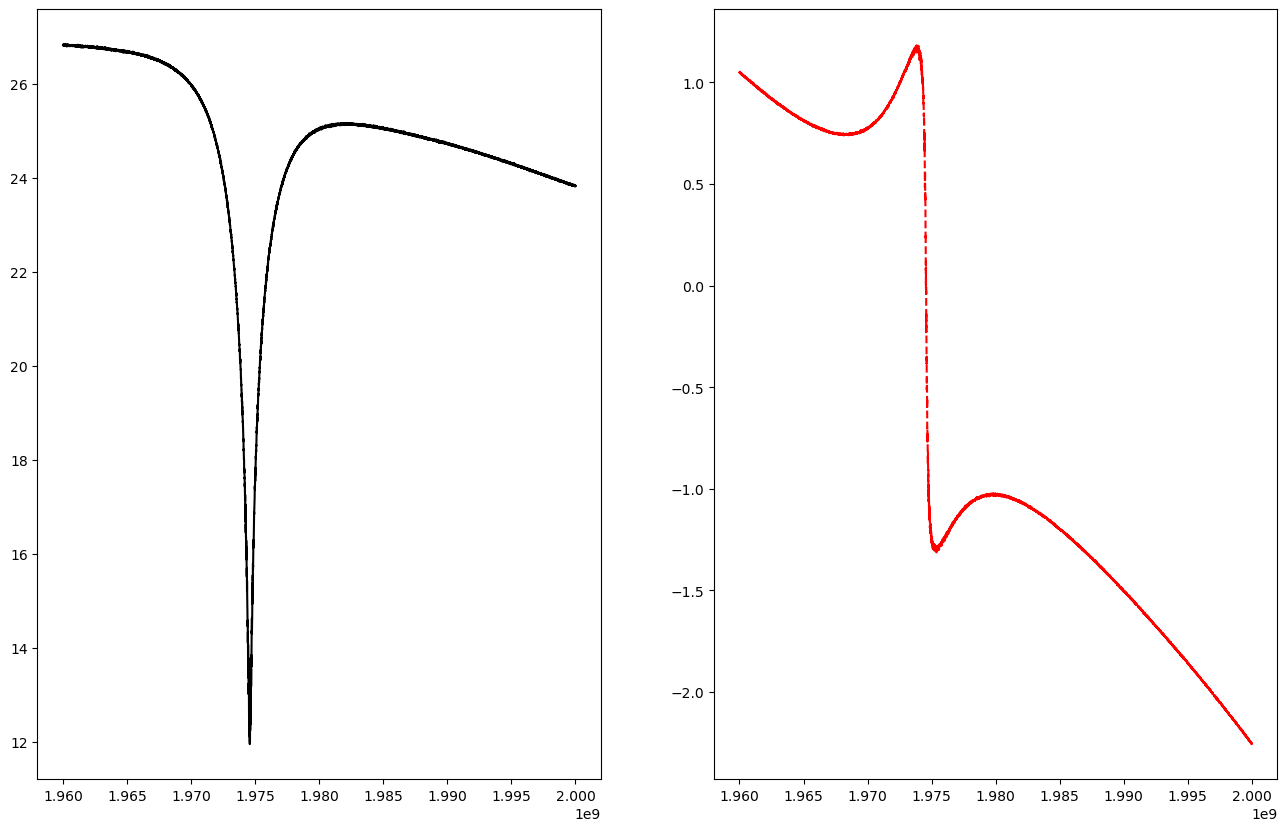

In [101]:
fig, ax = plt.subplots(1, 2, sharex=False, figsize=(16,10))
ax[0].plot(S21_freq_p1,20*log10(abs(Y1)),'k-')
ax[1].plot(S21_freq_p1,angle(Y1),'r--')

# Pico 2 - 3GHz

In [234]:
S21_freq_p2, S21_p2, fase_p2 = ImportS2P("C:/Users/molin/medidas mK/(sample2) Medidas mK CHIP1 2024_06_26/S21_span2.9_3.1GHz_-5dBm.csv"\
                                       ,Delimiter = " ", Cols = (0,1,2), Skip_head=1)

(2980000000.0, 3010000000.0)

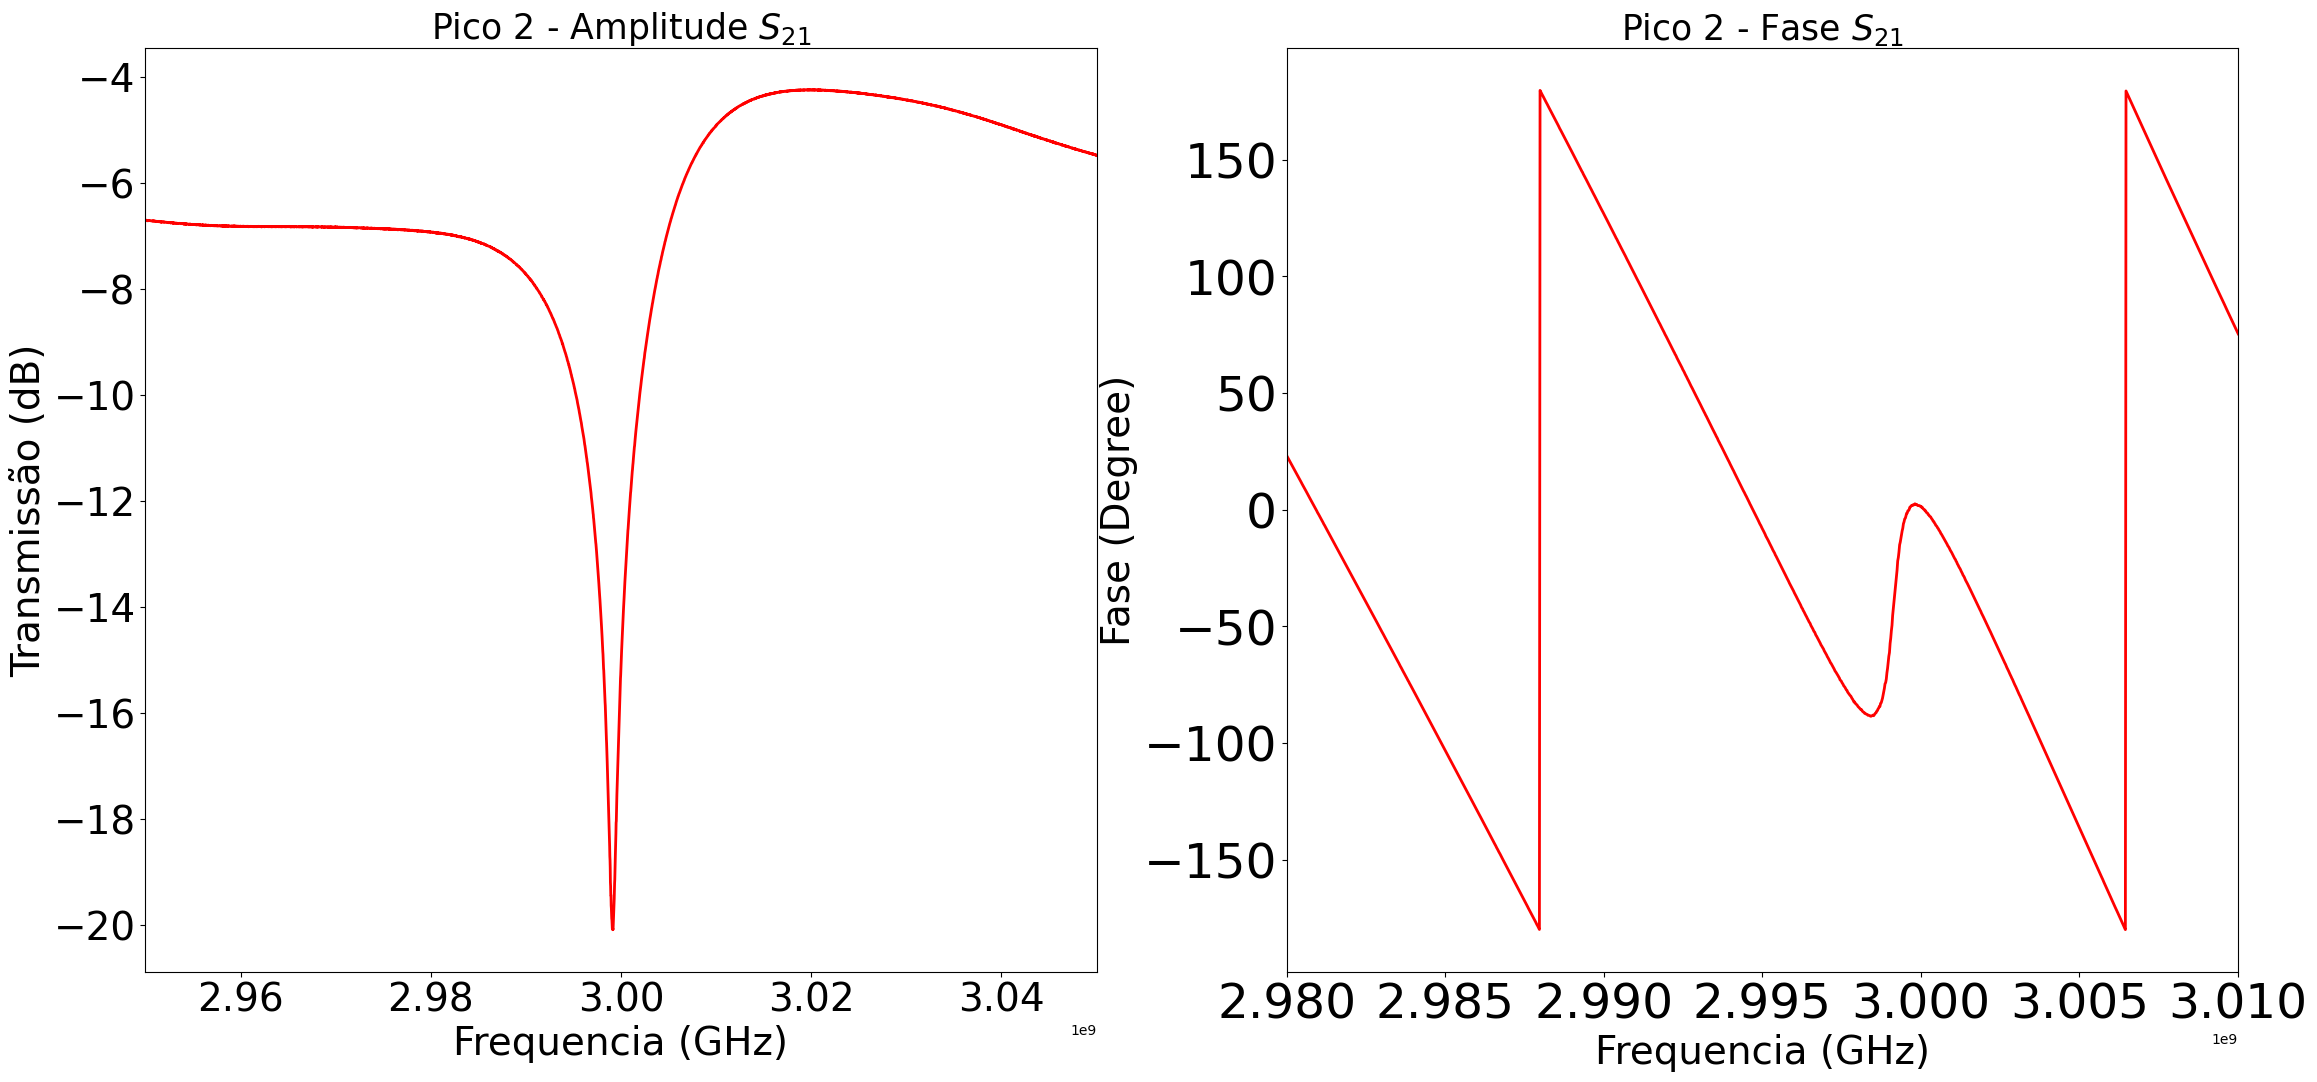

In [235]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p2, S21_p2, linewidth=2, color='red')
#ax[0].plot(fundo_freq_span18GHz, fundo_amp_span18GHz, linewidth=2, color='black')
ax[0].set_title("Pico 2 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (dB)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(2.95e9,3.05e9)

ax[1].plot(S21_freq_p2, fase_p2, linewidth=2, color='red')
#ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz, linewidth=2, color='black')
ax[1].set_title("Pico 2 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (Degree)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(2.98e9,3.01e9)

In [316]:
#dB to Volts
log20=10*log10(20)
S21_p2_l=pow(10,(S21_p2-log20)/20)
fundo_amp_span18GHz_l=pow(10,(fundo_amp_span18GHz-log20)/20)

#Unwrap Phase
#fase_p2_rad=math.radians(fase_p2)
fase_p2_l=unwrap(fase_p2*np.pi/180)
fundo_fase_span18GHz_l=unwrap(fundo_fase_span18GHz*np.pi/180)

(-50.0, 50.0)

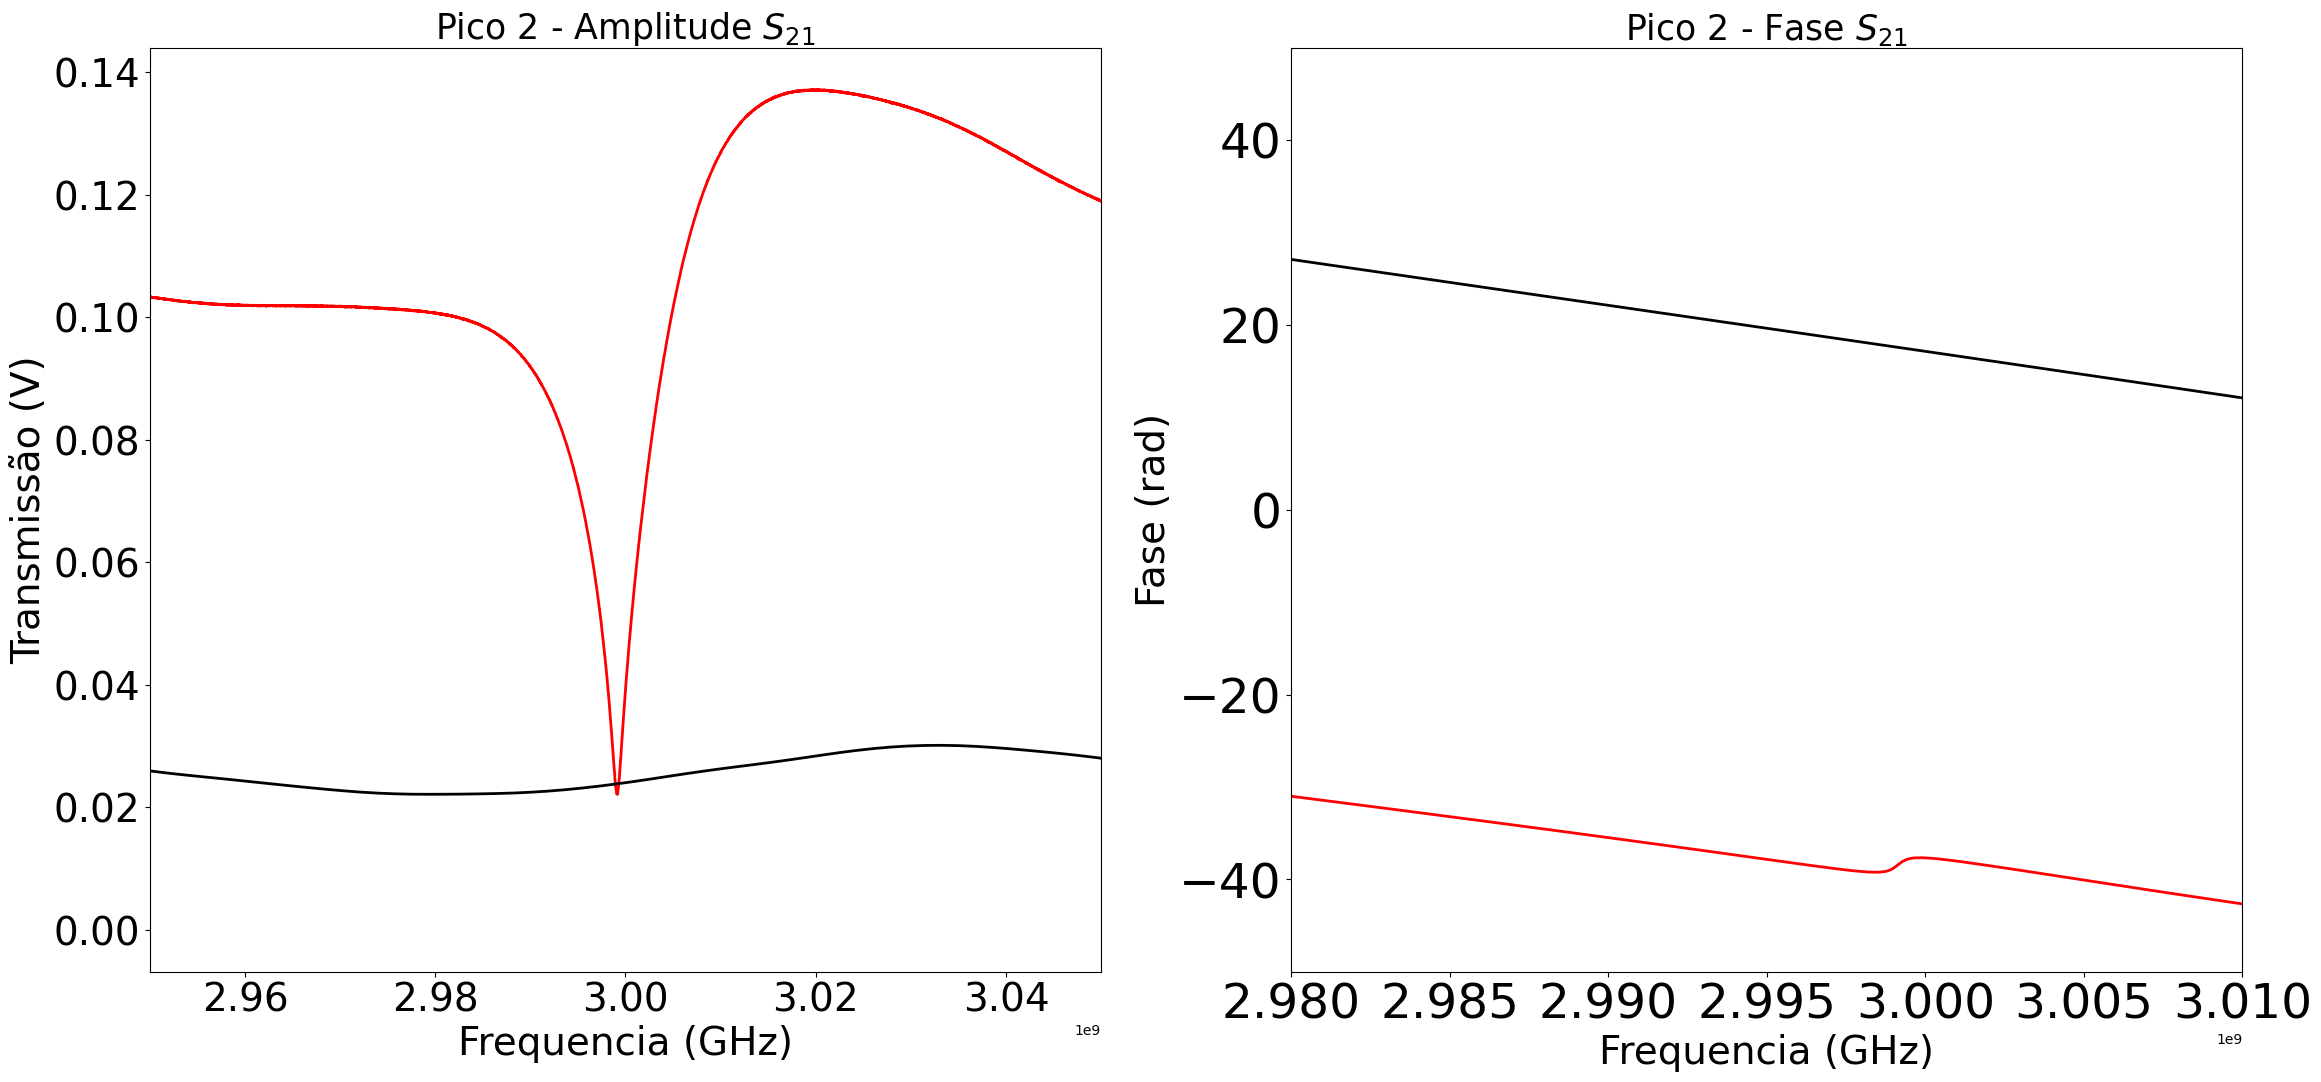

In [317]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p2, S21_p2_l, linewidth=2, color='red')
ax[0].plot(fundo_freq_span18GHz, fundo_amp_span18GHz_l, linewidth=2, color='black')
ax[0].set_title("Pico 2 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (V)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(2.95e9,3.05e9)

ax[1].plot(S21_freq_p2, fase_p2_l, linewidth=2, color='red')
ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz_l+1550, linewidth=2, color='black')
ax[1].set_title("Pico 2 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (rad)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(2.98e9,3.01e9)
ax[1].set_ylim(-50,50)

# correção dos dados

In [319]:
#interpolação
fundo_amp_span18GHz_l_fit=interp1d(fundo_freq_span18GHz,fundo_amp_span18GHz_l, kind='cubic')
fundo_fase_span18GHz_l_fit=interp1d(fundo_freq_span18GHz,fundo_fase_span18GHz_l, kind='cubic')

In [320]:
fase_p2_l_fit=wrap1(fundo_fase_span18GHz_l_fit(S21_freq_p2)-fase_p2_l)

(-5.0, 5.0)

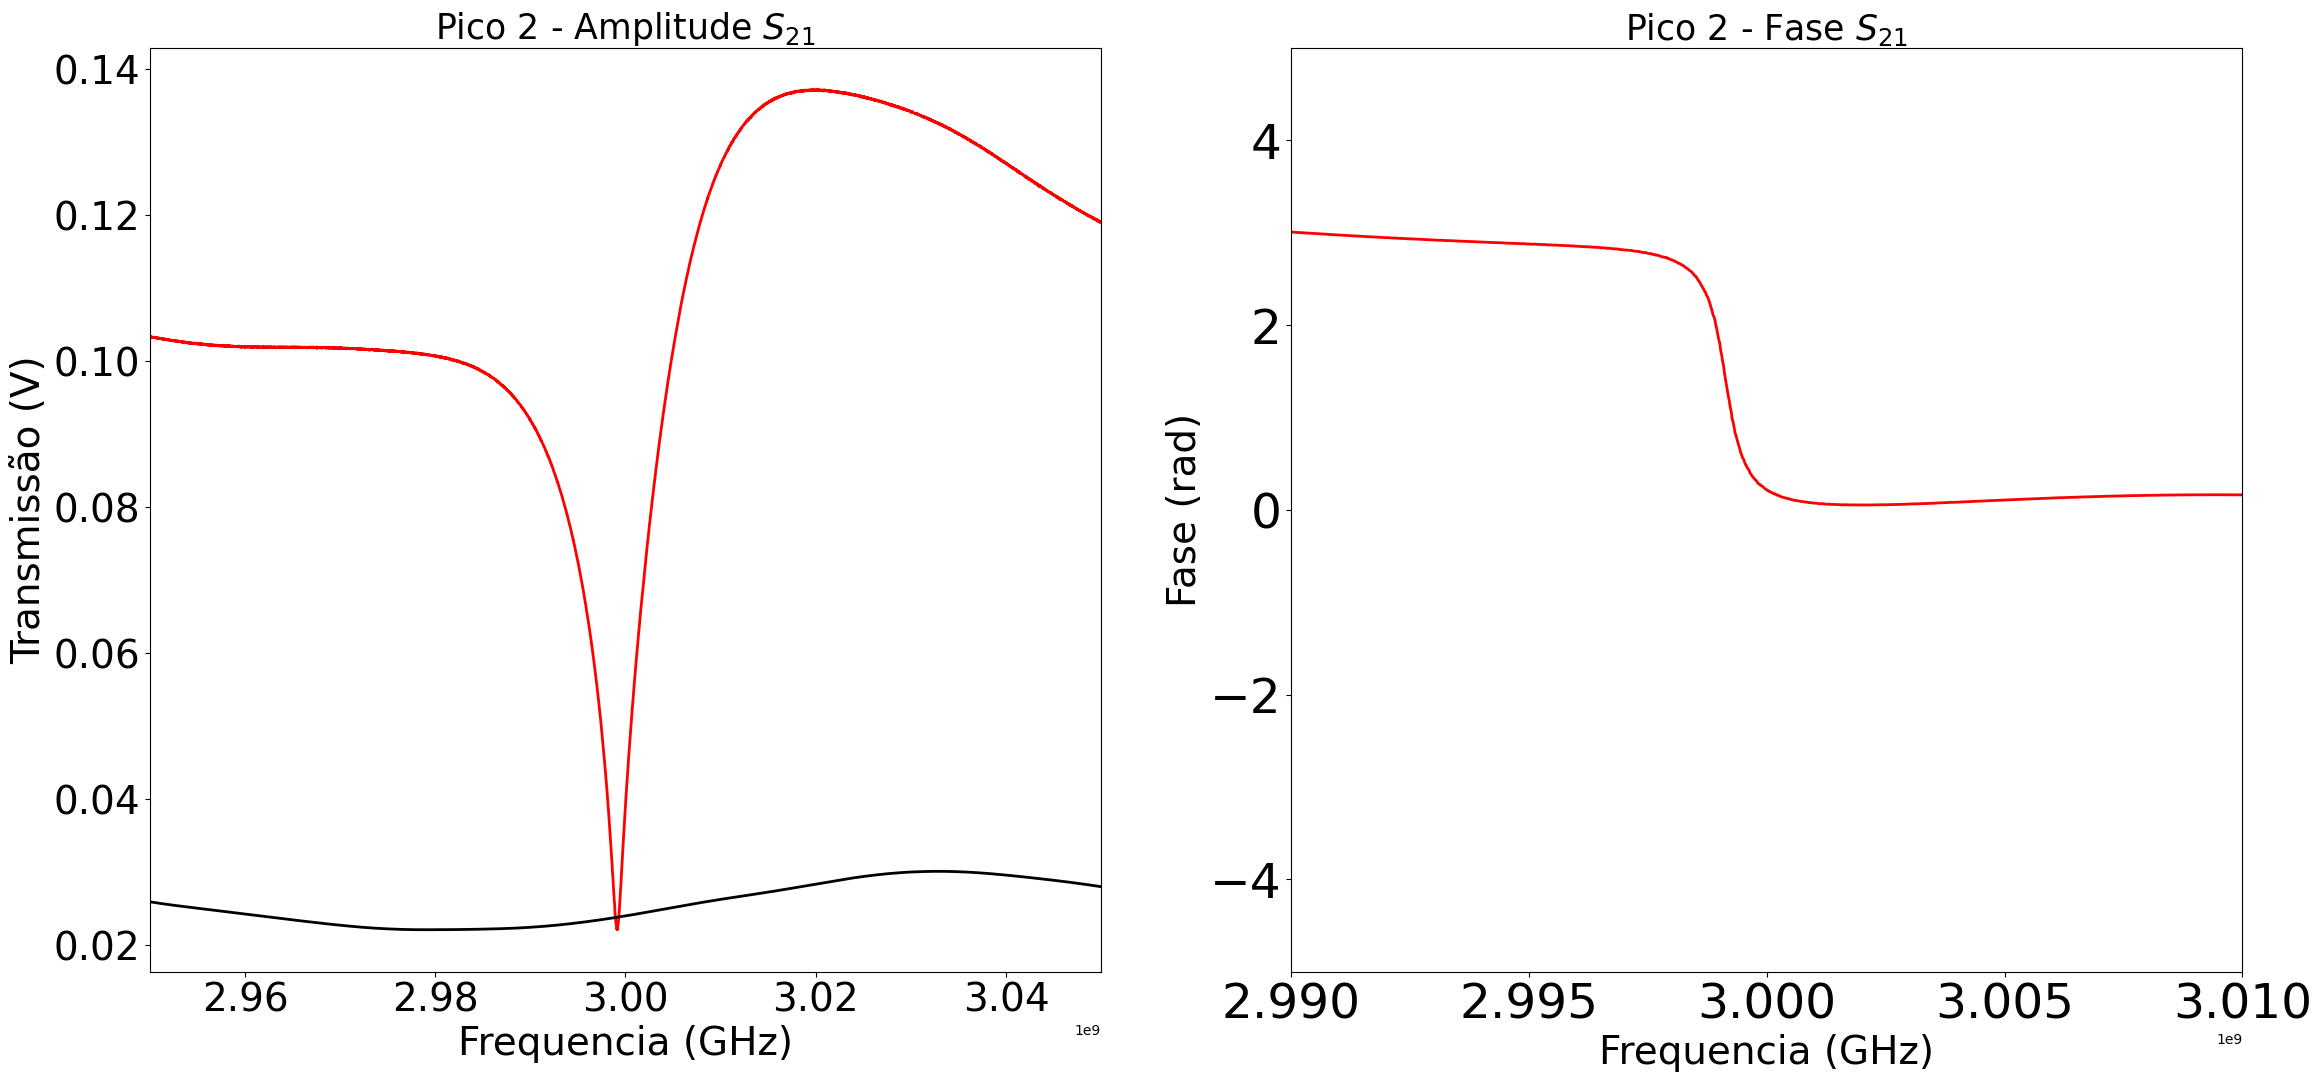

In [321]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p2, S21_p2_l, linewidth=2, color='red')
ax[0].plot(S21_freq_p2, fundo_amp_span18GHz_l_fit(S21_freq_p2), linewidth=2, color='black')
ax[0].set_title("Pico 2 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (V)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(2.95e9,3.05e9)

ax[1].plot(S21_freq_p2, fase_p2_l_fit, linewidth=2, color='red')
#ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz_l+1050, linewidth=2, color='black')
ax[1].set_title("Pico 2 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (rad)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(2.99e9,3.01e9)
ax[1].set_ylim(-5,5)

In [322]:
#NORMALIZAR DADOS
S21_p2_l_norm=S21_p2_l/fundo_amp_span18GHz_l_fit(S21_freq_p2)

(2990000000.0, 3010000000.0)

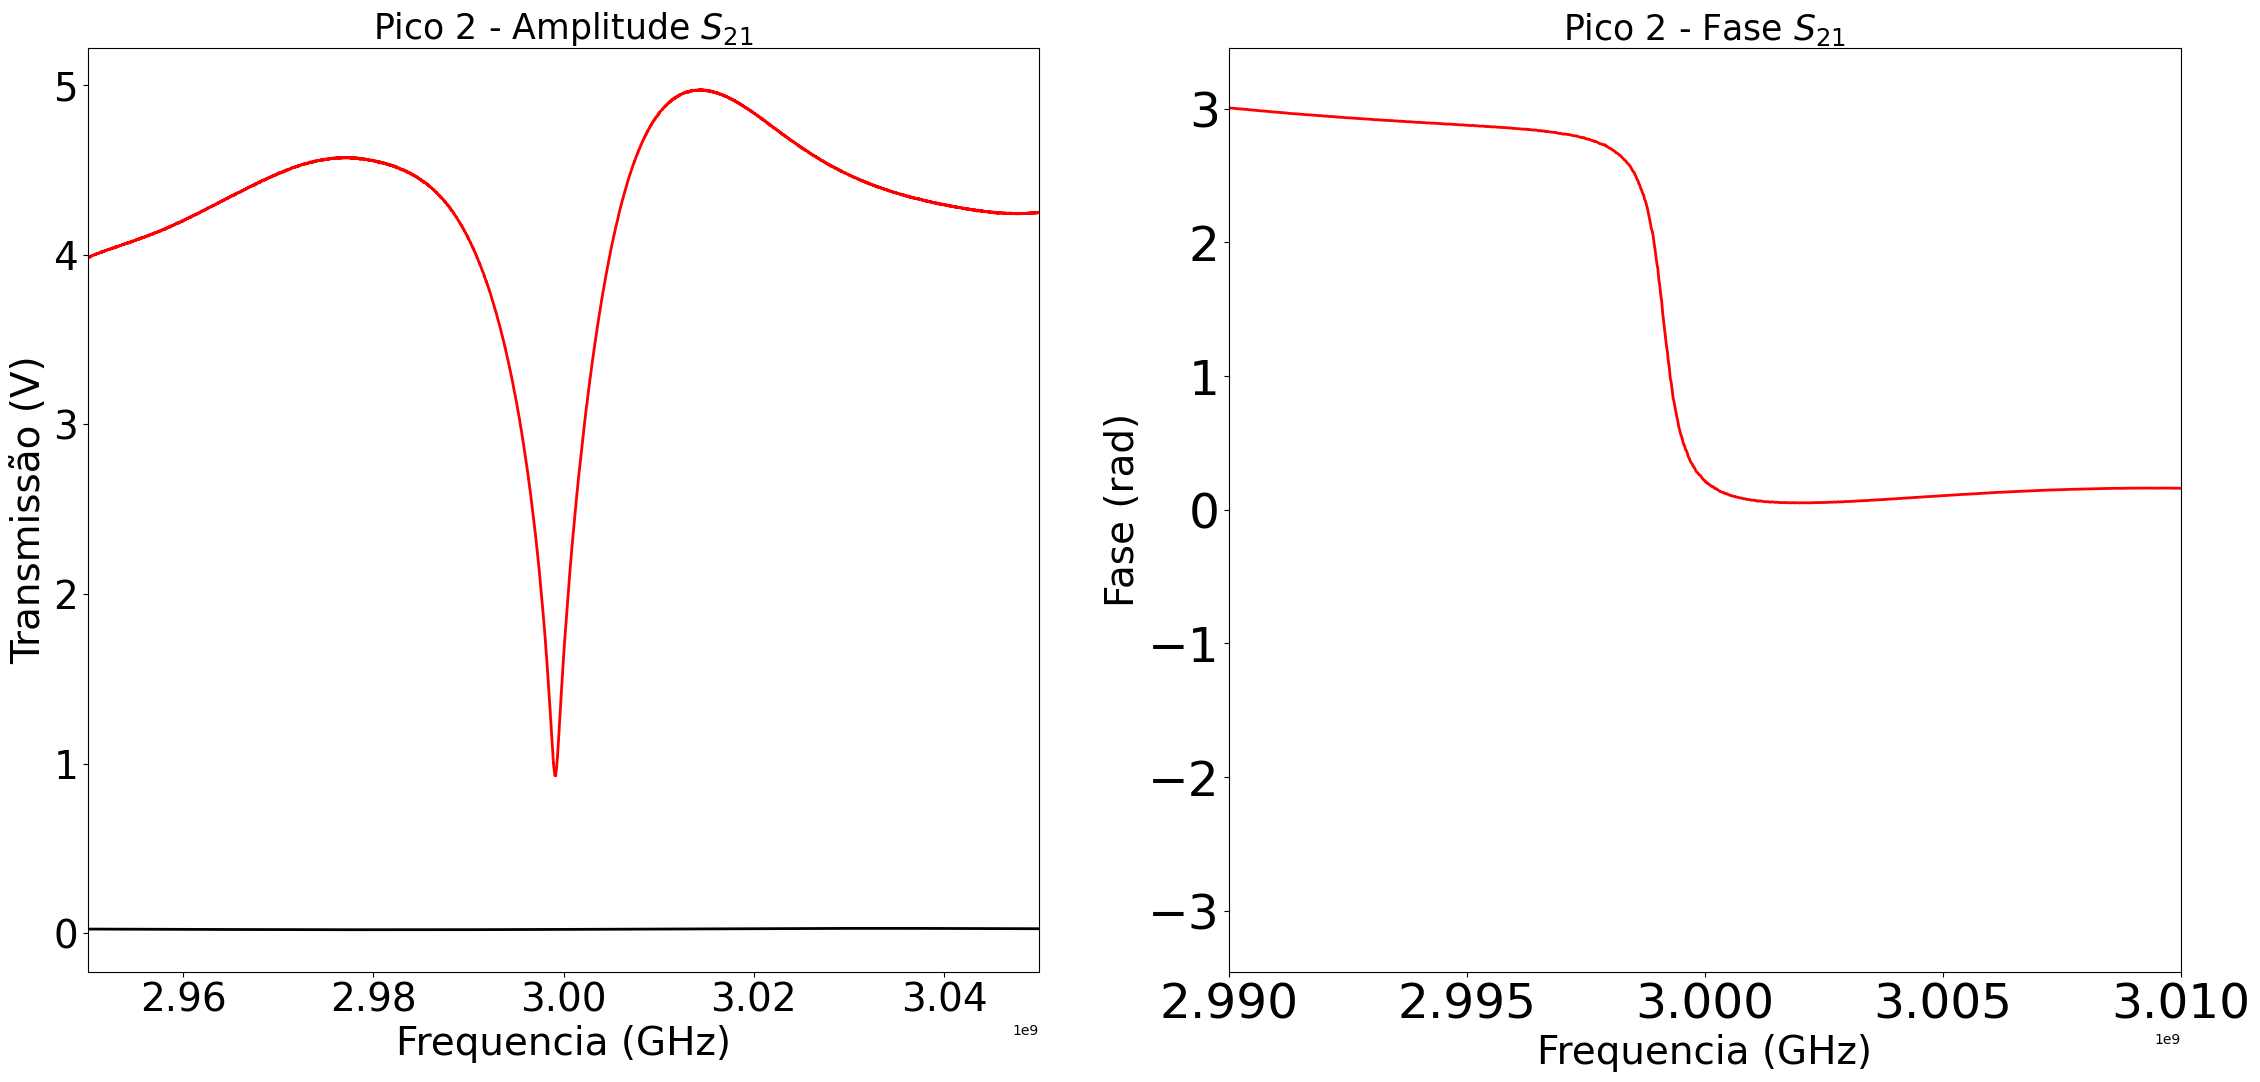

In [323]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p2, S21_p2_l_norm, linewidth=2, color='red')
ax[0].plot(S21_freq_p2, fundo_amp_span18GHz_l_fit(S21_freq_p2), linewidth=2, color='black')
ax[0].set_title("Pico 2 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (V)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(2.95e9,3.05e9)

ax[1].plot(S21_freq_p2, fase_p2_l_fit, linewidth=2, color='red')
#ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz_l+1010, linewidth=2, color='black')
ax[1].set_title("Pico 2 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (rad)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(2.99e9,3.01e9)
#ax[1].set_ylim(-3,3)

In [324]:
#Re/Im Fit e Rotação dos dados
# Method to calculate the center and radius of points in a circuference
from scipy      import  odr

# Import Data
X0 = S21_freq_p2
Y0 = S21_p2_l_norm*(exp(1j*fase_p2_l_fit))* (exp(1j*np.pi))

x = Y0.real
y = Y0.imag

x_m = mean(x)
y_m = mean(y)

def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return sqrt((x-xc)**2 + (y-yc)**2)

x_m = mean(x)
y_m = mean(y)


# method_3 = "odr"

def f_3(beta, x):
    """ implicit definition of the circle """
    return (x[0]-beta[0])**2 + (x[1]-beta[1])**2 -beta[2]**2

# initial guess for parameters
R_m = calc_R(x_m, y_m).mean()
beta0 = [ x_m, y_m, R_m]

d = sqrt((x-x_m)**2+(y-y_m)**2)
error = R_m/sqrt(mean((d-R_m)**2))
# print(error)


# for implicit function :
#       data.x contains both coordinates of the points (data.x = [x, y])
#       data.y is the dimensionality of the response
lsc_data  = odr.Data(row_stack([x, y]),y=1)#,we=1/error,wd=error)
lsc_model = odr.Model(f_3, implicit=True)
lsc_odr   = odr.ODR(lsc_data, lsc_model, beta0)
lsc_out   = lsc_odr.run()

xc_3, yc_3, R_3 = lsc_out.beta
Ri_3 = calc_R(xc_3, yc_3)
residu_3 = sum((Ri_3 - R_3)**2)
lsc_out.beta

array([-0.02986185,  0.14704172,  4.22443261])

-0.02986184927563663 0.14704172181539524 4.224432613409952
1.771155689388199


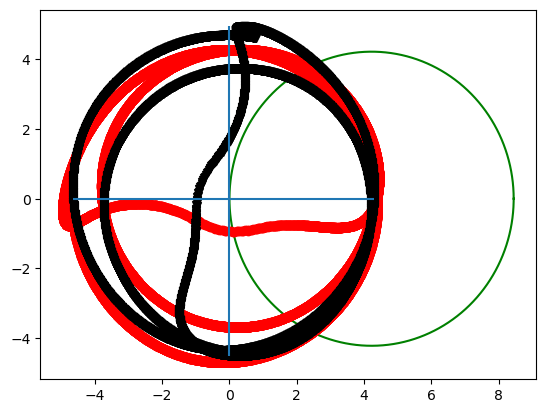

In [325]:
x0 = lsc_out.beta[0]
y0 = lsc_out.beta[1]
r0 = lsc_out.beta[2]


a = linspace(0,2*pi,1000)
x = r0 + r0 *cos(a)
y =  r0 *sin(a)
print(x0,y0,r0)

plt.plot(x,y,'g-')
plt.plot(Y0.real,Y0.imag,'ro')
Angle = arctan2(y0,x0)
print(Angle)
Y1=(Y0-complex(x0,y0))*exp(-1j*Angle)+sqrt(x0**2+y0**2)
#Y1=(Y0)*exp(1j*Angle)

plt.plot(Y1.real,Y1.imag,'kv')
#plt.plot(Fit.real,Fit.imag,'go')
plt.hlines(0,min(Y1.real),max(Y1.real))
plt.vlines(0,min(Y1.imag),max(Y1.imag))

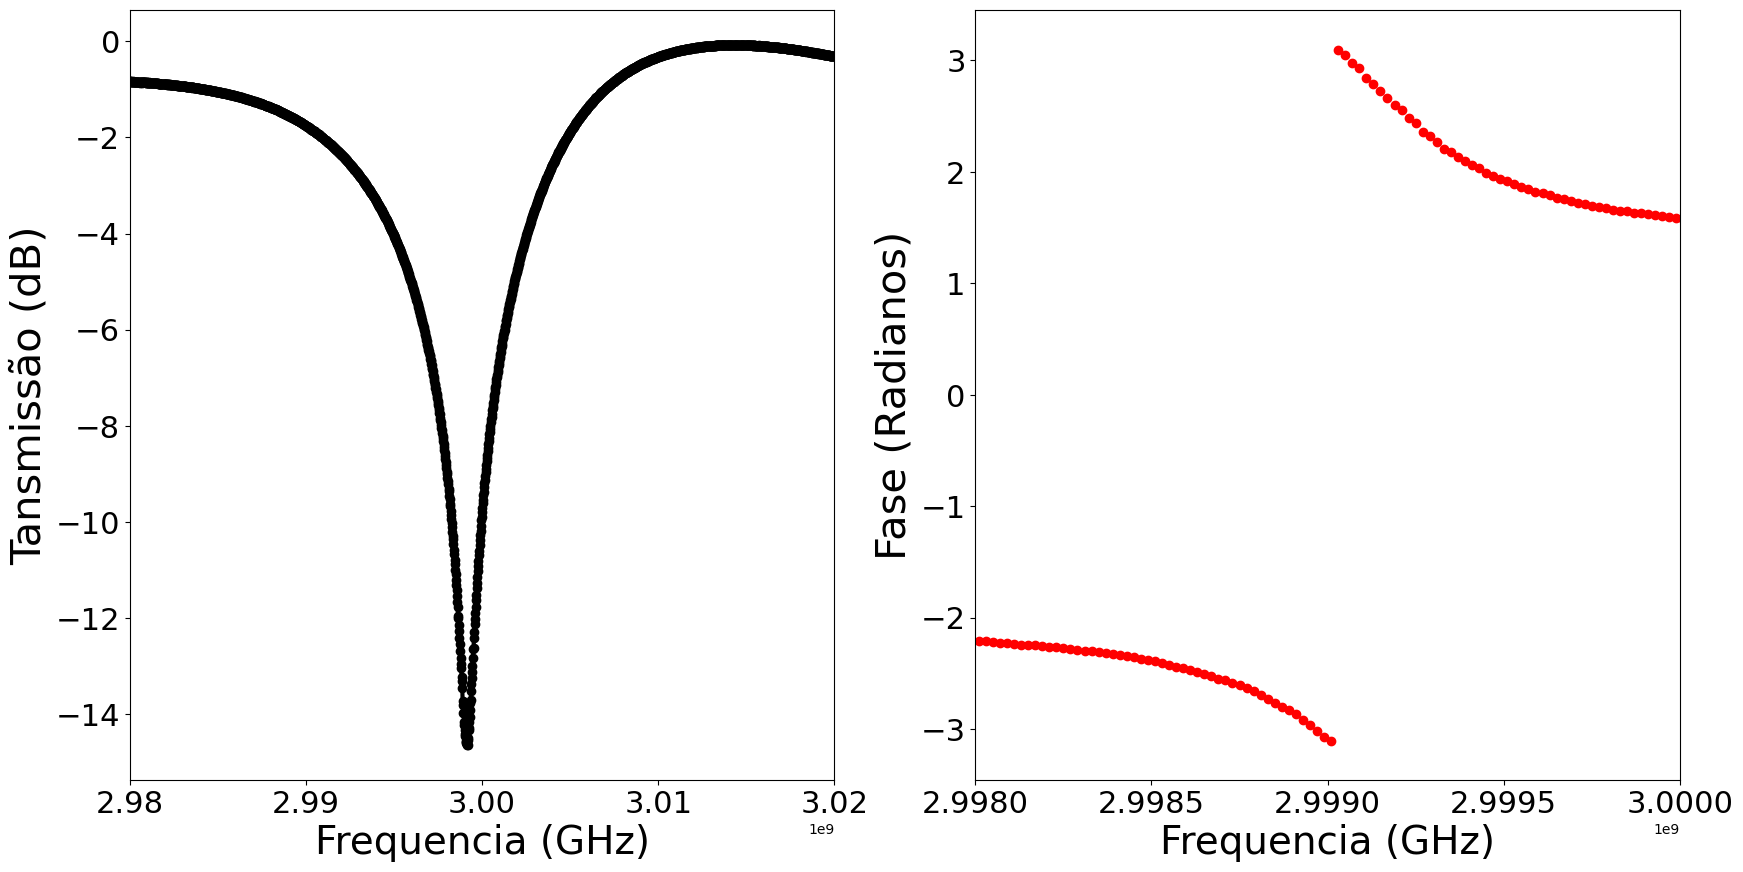

In [328]:
fig, ax = plt.subplots(1, 2, sharex=False, figsize=(20,10))
ax[0].plot(S21_freq_p2,(20*log10(abs(Y1)))-14,'k-o', linewidth=3)
#ax[0].set_title("$S_{21}$ Amplitude Ressonador 1", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Tansmissão (dB)", fontsize=30)
ax[0].tick_params(axis='both', which='major', labelsize=22)
ax[0].set_xlim(2.98e9,3.02e9)

ax[1].plot(S21_freq_p2,angle(Y1),'ro', linewidth=3)
ax[1].set_xlim(2.998e9,3e9)
#ax[1].set_title("$S_{21}$ Fase Ressonador 1", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (Radianos)", fontsize=30)
ax[1].tick_params(axis='both', which='major', labelsize=22)

# Pico 3 - 4GHz

In [ ]:
S21_freq_p3, S21_p3, fase_p3 = ImportS2P("C:/Users/molin/medidas mK/(sample2) Medidas mK CHIP1 2024_06_26/S21_span3.9_4.1GHz_-5dBm.csv"\
                                       ,Delimiter = " ", Cols = (0,1,2), Skip_head=1)

In [ ]:
fundo_freq_span2GHz, fundo_amp_span2GHz, fundo_fase_span2GHz

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p3, S21_p3, linewidth=2, color='red')
ax[0].plot(fundo_freq_span18GHz, fundo_amp_span18GHz, linewidth=2, color='black')
ax[0].set_title("Pico 3 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (dB)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(3.96e9,4.05e9)

ax[1].plot(S21_freq_p3, fase_p3, linewidth=2, color='red')
ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz, linewidth=2, color='black')
ax[1].set_title("Pico 3 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (Degree)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(3.98e9,4.01e9)

In [ ]:
#dB to Volts
log20=10*log10(20)
S21_p3_l=pow(10,(S21_p3-log20)/20)
fundo_amp_span18GHz_l=pow(10,(fundo_amp_span18GHz-log20)/20)

#Unwrap Phase
fase_p3_l=unwrap(radians(fase_p3))
fundo_fase_span18GHz_l=unwrap(radians(fundo_fase_span18GHz))

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p3, S21_p3_l, linewidth=2, color='red')
ax[0].plot(fundo_freq_span18GHz, fundo_amp_span18GHz_l, linewidth=2, color='black')
ax[0].set_title("Pico 3 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (V)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(3.96e9,4.05e9)

ax[1].plot(S21_freq_p3, fase_p3_l, linewidth=2, color='red')
ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz_l+2000, linewidth=2, color='black')
ax[1].set_title("Pico 3 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (rad)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(3.98e9,4.01e9)
ax[1].set_ylim(-50,50)

In [ ]:
#interpolação
fundo_amp_span18GHz_l_fit=interp1d(fundo_freq_span18GHz,fundo_amp_span18GHz_l, kind='cubic')
fundo_fase_span18GHz_l_fit=interp1d(fundo_freq_span18GHz,fundo_fase_span18GHz_l, kind='cubic')

In [ ]:
fase_p3_l_fit=wrap1(fundo_fase_span18GHz_l_fit(S21_freq_p3)-fase_p3_l)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p3, S21_p3_l, linewidth=2, color='red')
ax[0].plot(S21_freq_p3, fundo_amp_span18GHz_l_fit(S21_freq_p3), linewidth=2, color='black')
ax[0].set_title("Pico 3 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (V)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(3.96e9,4.05e9)

ax[1].plot(S21_freq_p3, fase_p3_l_fit, linewidth=2, color='red')
#ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz_l+1050, linewidth=2, color='black')
ax[1].set_title("Pico 3 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (rad)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(3.98e9,4.01e9)
#ax[1].set_ylim(-5,5)

In [ ]:
#NORMALIZAR DADOS
S21_p3_l_norm=S21_p3_l/fundo_amp_span18GHz_l_fit(S21_freq_p3)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p3, S21_p3_l_norm, linewidth=2, color='red')
ax[0].plot(S21_freq_p3, fundo_amp_span18GHz_l_fit(S21_freq_p3), linewidth=2, color='black')
ax[0].set_title("Pico 3 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (V)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(3.96e9,4.05e9)

ax[1].plot(S21_freq_p3, fase_p3_l_fit, linewidth=2, color='red')
#ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz_l+1010, linewidth=2, color='black')
ax[1].set_title("Pico 3 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (rad)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(3.99e9,4e9)
#ax[1].set_ylim(-3,3)

In [ ]:
#Re/Im Fit e Rotação dos dados
# Method to calculate the center and radius of points in a circuference
from scipy      import  odr

# Import Data
X0 = S21_freq_p3
Y0 = S21_p3_l_norm*(exp(1j*fase_p3_l_fit))* (exp(1j*np.pi))

x = Y0.real
y = Y0.imag

x_m = mean(x)
y_m = mean(y)

def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return sqrt((x-xc)**2 + (y-yc)**2)

x_m = mean(x)
y_m = mean(y)


# method_3 = "odr"

def f_3(beta, x):
    """ implicit definition of the circle """
    return (x[0]-beta[0])**2 + (x[1]-beta[1])**2 -beta[2]**2

# initial guess for parameters
R_m = calc_R(x_m, y_m).mean()
beta0 = [ x_m, y_m, R_m]

d = sqrt((x-x_m)**2+(y-y_m)**2)
error = R_m/sqrt(mean((d-R_m)**2))
# print(error)


# for implicit function :
#       data.x contains both coordinates of the points (data.x = [x, y])
#       data.y is the dimensionality of the response
lsc_data  = odr.Data(row_stack([x, y]),y=1)#,we=1/error,wd=error)
lsc_model = odr.Model(f_3, implicit=True)
lsc_odr   = odr.ODR(lsc_data, lsc_model, beta0)
lsc_out   = lsc_odr.run()

xc_3, yc_3, R_3 = lsc_out.beta
Ri_3 = calc_R(xc_3, yc_3)
residu_3 = sum((Ri_3 - R_3)**2)
lsc_out.beta

In [ ]:
x0 = lsc_out.beta[0]
y0 = lsc_out.beta[1]
r0 = lsc_out.beta[2]


a = linspace(0,2*pi,1000)
x = r0 + r0 *cos(a)
y =  r0 *sin(a)
print(x0,y0,r0)

plt.plot(x,y,'g-')
plt.plot(Y0.real,Y0.imag,'ro')
Angle = arctan2(y0,x0)
print(Angle)
Y1=(Y0-complex(x0,y0))*exp(-1j*Angle)+sqrt(x0**2+y0**2)
#Y1=(Y0)*exp(1j*Angle)

plt.plot(Y1.real,Y1.imag,'kv')
#plt.plot(Fit.real,Fit.imag,'go')
plt.hlines(0,min(Y1.real),max(Y1.real))
plt.vlines(0,min(Y1.imag),max(Y1.imag))

In [ ]:
fig, ax = plt.subplots(1, 2, sharex=False, figsize=(16,10))
ax[0].plot(S21_freq_p3,20*log10(abs(Y1)),'k-')
ax[1].plot(S21_freq_p3,angle(Y1),'r--')
ax[1].set_xlim(3.992e9,3.998e9)

# Pico 4 - 5,1 GHz

In [329]:
S21_freq_p4, S21_p4, fase_p4 = ImportS2P("C:/Users/molin/medidas mK/(sample2) Medidas mK CHIP1 2024_06_26/S21_span5_5.2GHz_-5dBm.csv"\
                                       ,Delimiter = " ", Cols = (0,1,2), Skip_head=1)

(5070000000.0, 5100000000.0)

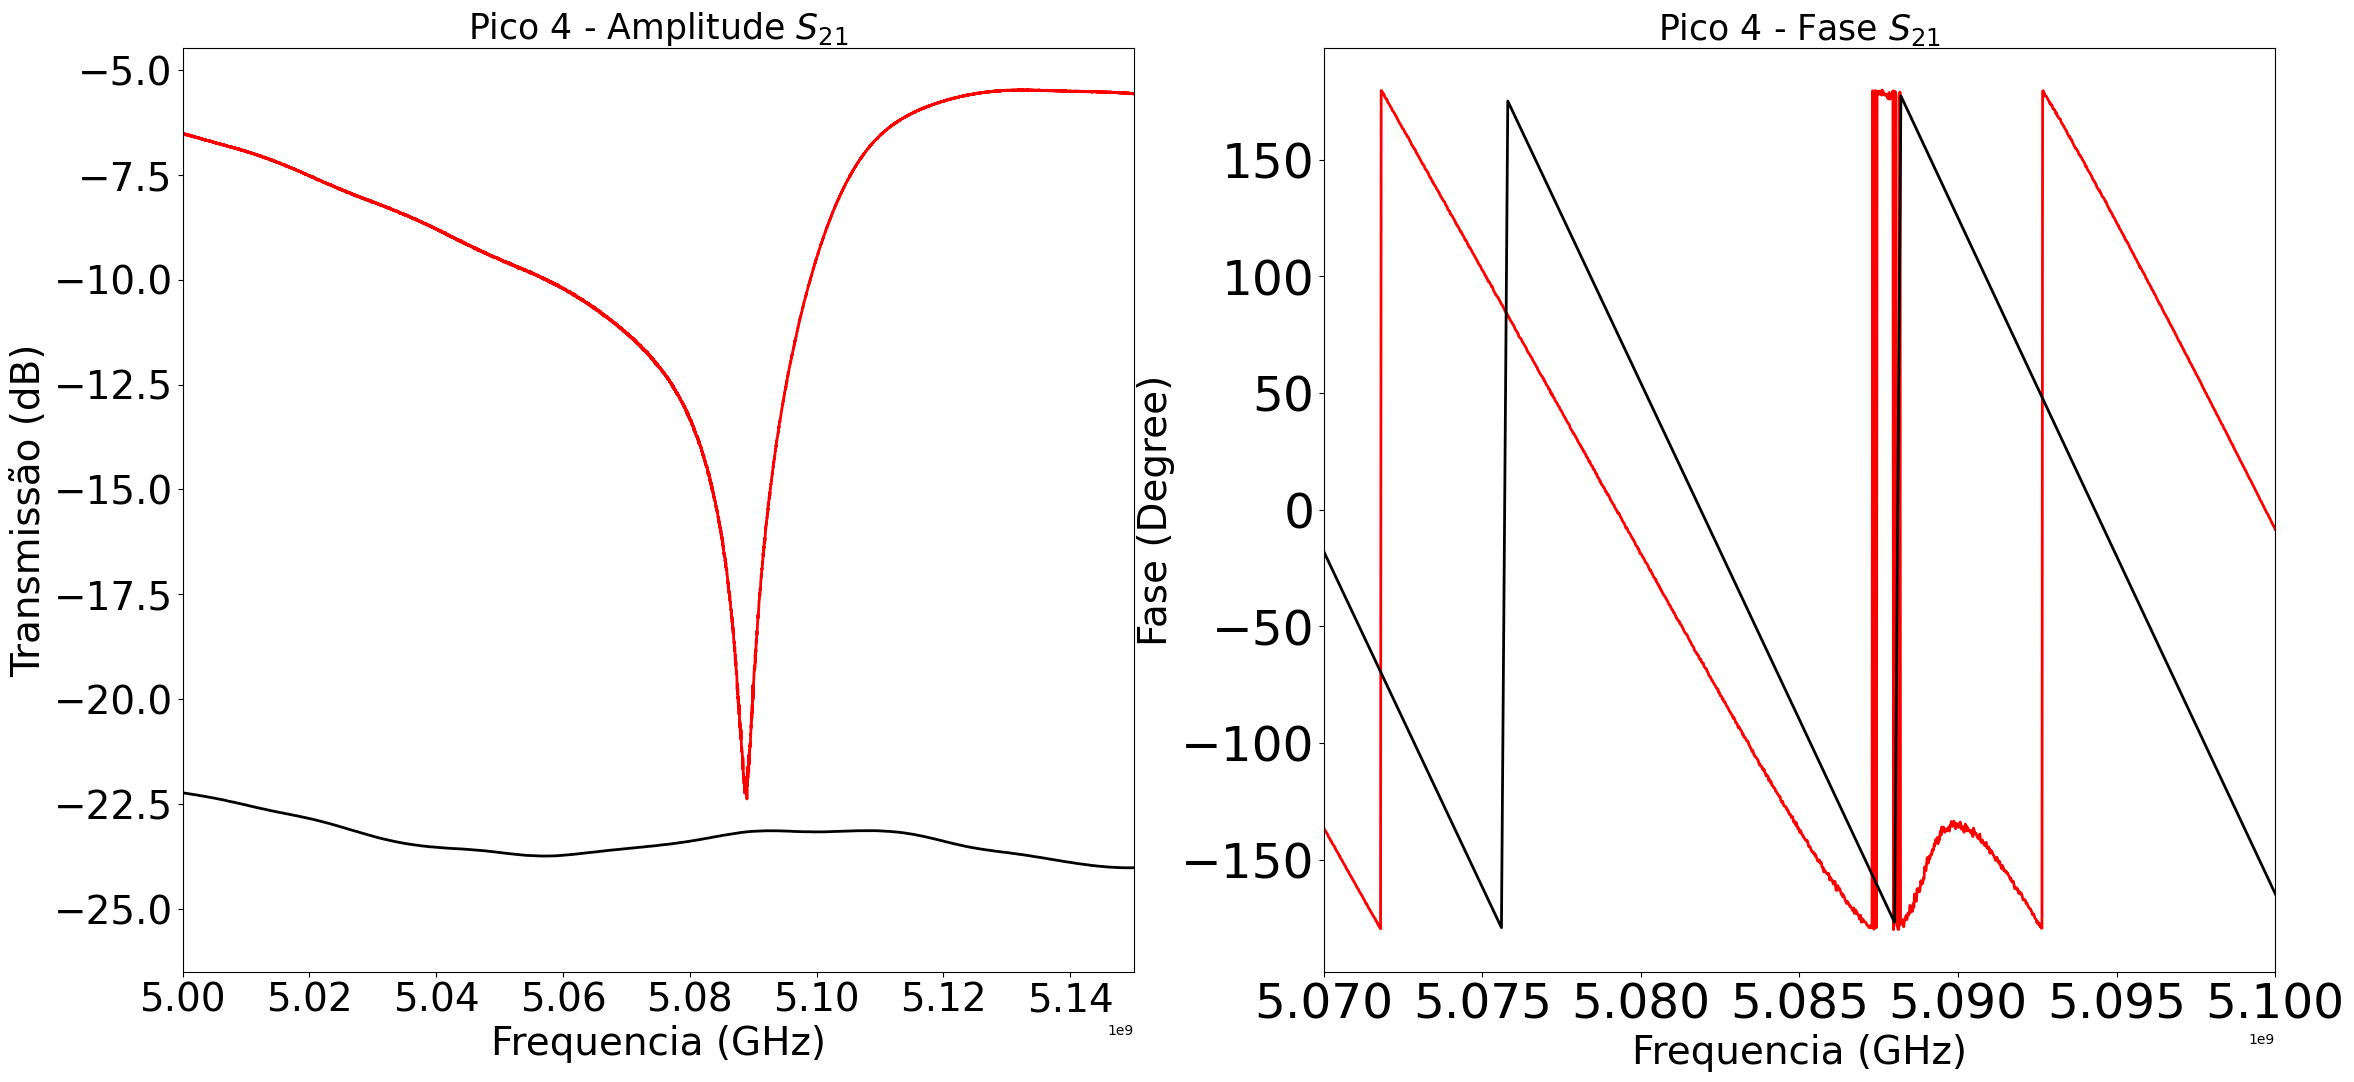

In [330]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p4, S21_p4, linewidth=2, color='red')
ax[0].plot(fundo_freq_span2GHz, fundo_amp_span2GHz, linewidth=2, color='black')
ax[0].set_title("Pico 4 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (dB)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(5e9,5.15e9)

ax[1].plot(S21_freq_p4, fase_p4, linewidth=2, color='red')
ax[1].plot(fundo_freq_span2GHz, fundo_fase_span2GHz, linewidth=2, color='black')
ax[1].set_title("Pico 4 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (Degree)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(5.07e9,5.10e9)

In [331]:
#dB to Volts
log20=10*log10(20)
S21_p4_l=pow(10,(S21_p4-log20)/20)
fundo_amp_span2GHz_l=pow(10,(fundo_amp_span2GHz-log20)/20)

#Unwrap Phase
fase_p4_l=unwrap(radians(fase_p4))
fundo_fase_span2GHz_l=unwrap(radians(fundo_fase_span2GHz))

(-50.0, 50.0)

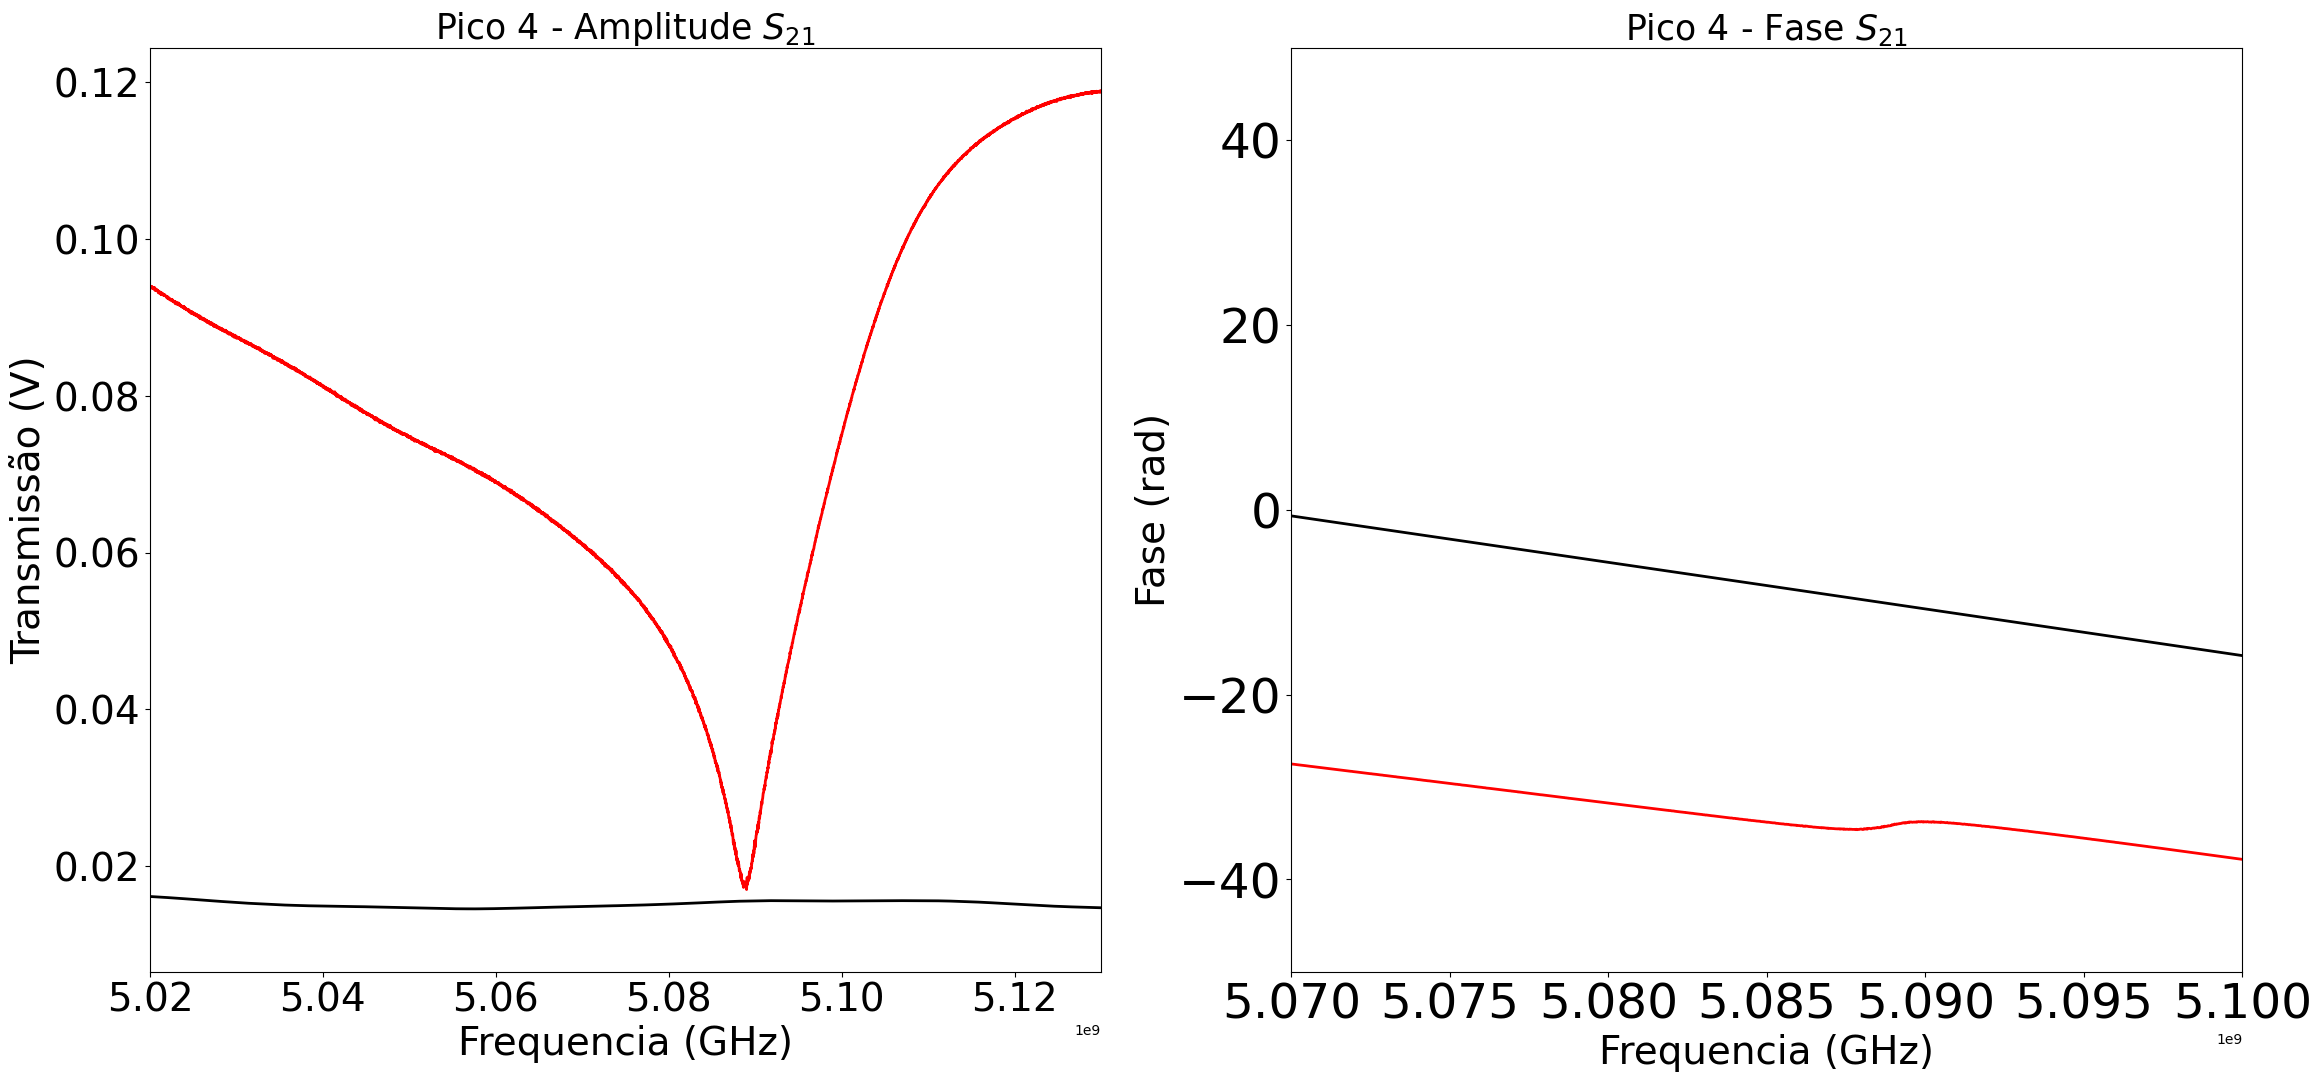

In [332]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p4, S21_p4_l, linewidth=2, color='red')
ax[0].plot(fundo_freq_span2GHz, fundo_amp_span2GHz_l, linewidth=2, color='black')
ax[0].set_title("Pico 4 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (V)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(5.02e9,5.13e9)

ax[1].plot(S21_freq_p4, fase_p4_l, linewidth=2, color='red')
ax[1].plot(fundo_freq_span2GHz, fundo_fase_span2GHz_l+540, linewidth=2, color='black')
ax[1].set_title("Pico 4 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (rad)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(5.07e9,5.10e9)
ax[1].set_ylim(-50,50)

In [333]:
#interpolação
fundo_amp_span2GHz_l_fit=interp1d(fundo_freq_span2GHz,fundo_amp_span2GHz_l, kind='cubic')
fundo_fase_span2GHz_l_fit=interp1d(fundo_freq_span2GHz,fundo_fase_span2GHz_l, kind='cubic')

In [334]:
fase_p4_l_fit=wrap1(fundo_fase_span2GHz_l_fit(S21_freq_p4)-fase_p4_l)

(5070000000.0, 5100000000.0)

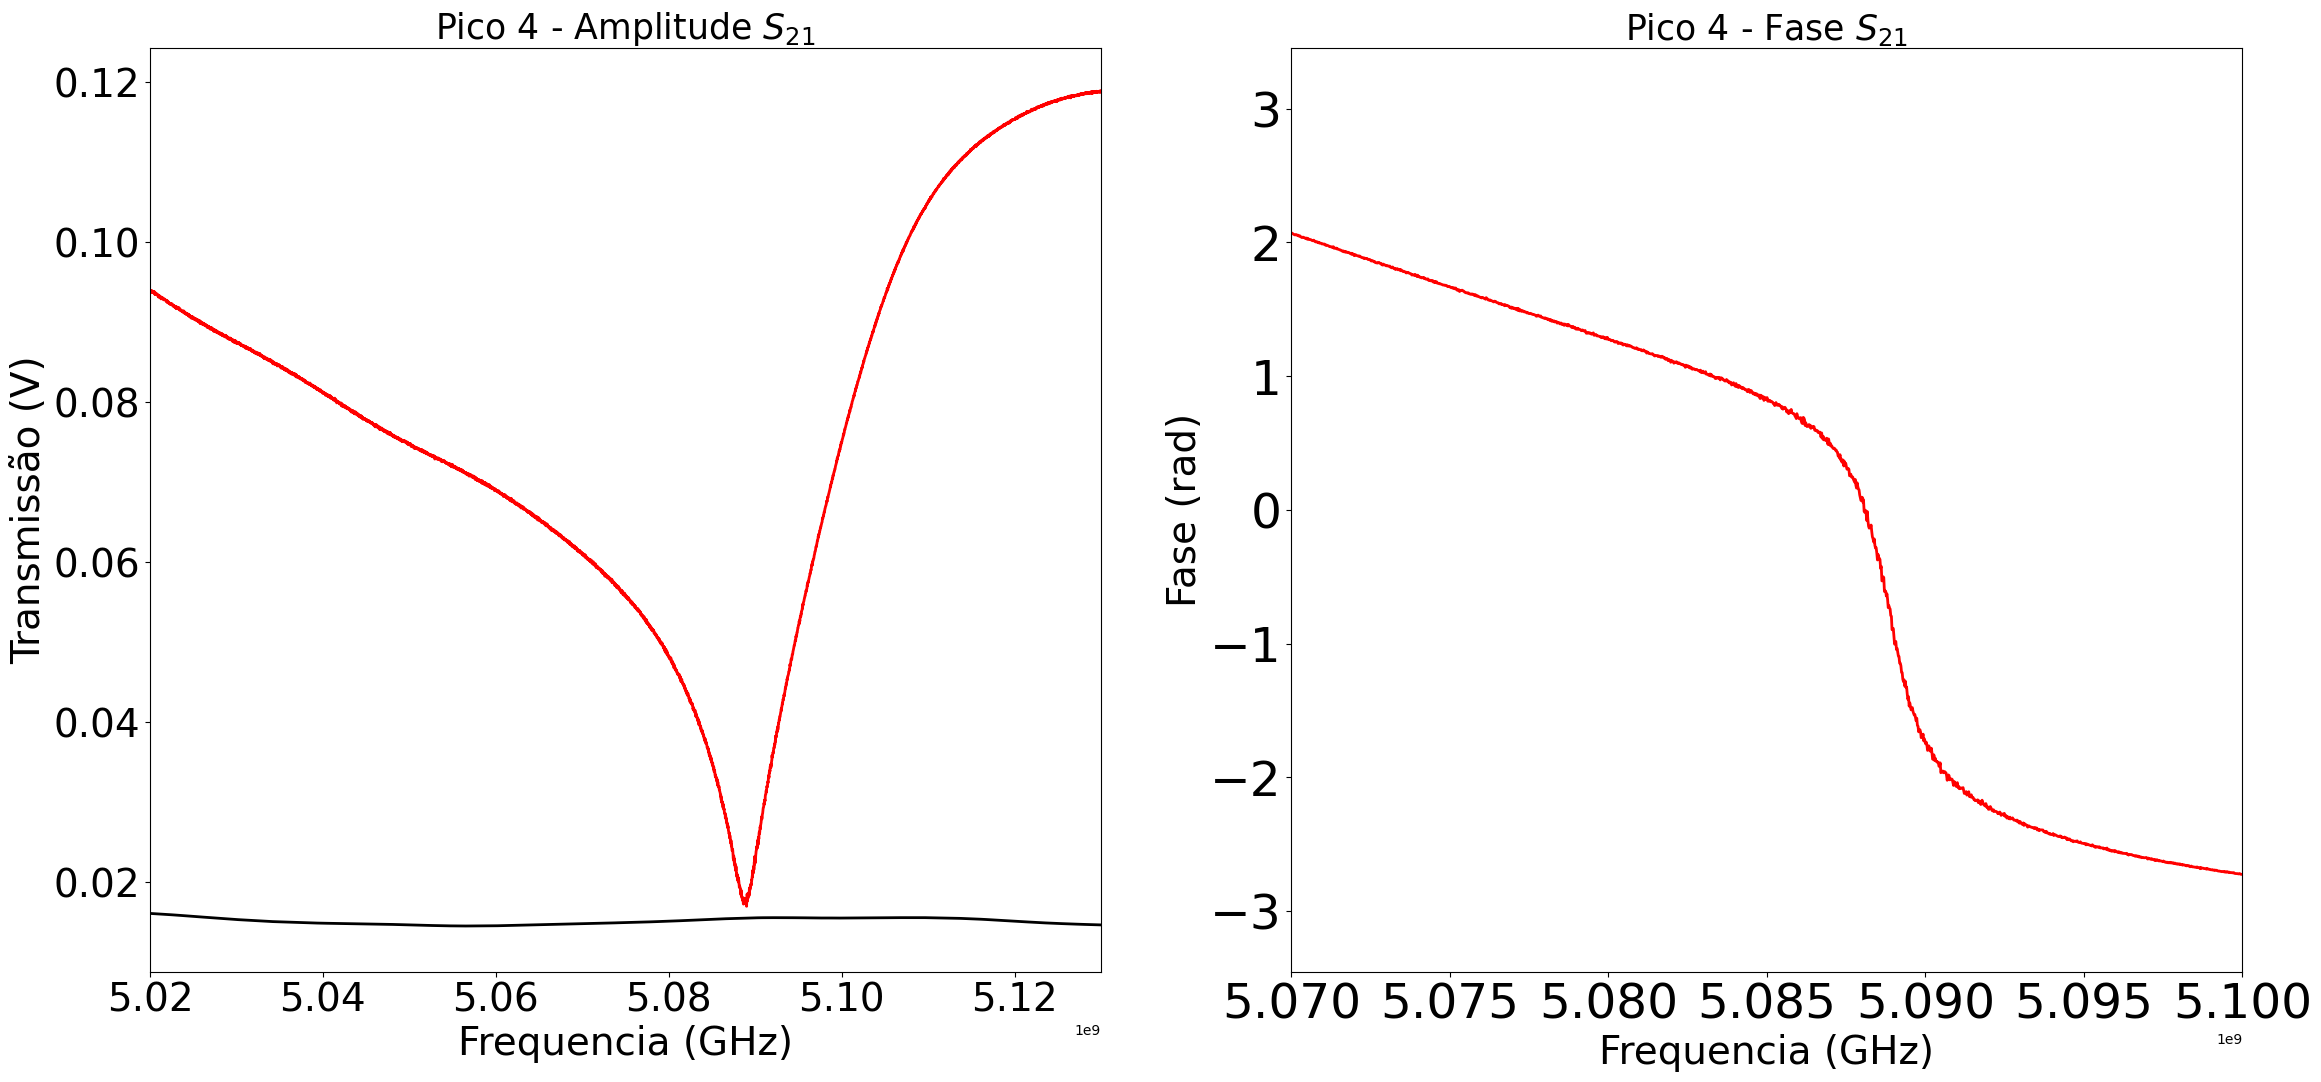

In [335]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p4, S21_p4_l, linewidth=2, color='red')
ax[0].plot(S21_freq_p4, fundo_amp_span2GHz_l_fit(S21_freq_p4), linewidth=2, color='black')
ax[0].set_title("Pico 4 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (V)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(5.02e9,5.13e9)

ax[1].plot(S21_freq_p4, fase_p4_l_fit, linewidth=2, color='red')
#ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz_l+1050, linewidth=2, color='black')
ax[1].set_title("Pico 4 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (rad)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(5.07e9,5.10e9)
#ax[1].set_ylim(-5,5)

In [336]:
#NORMALIZAR DADOS
S21_p4_l_norm=S21_p4_l/fundo_amp_span2GHz_l_fit(S21_freq_p4)

(5070000000.0, 5100000000.0)

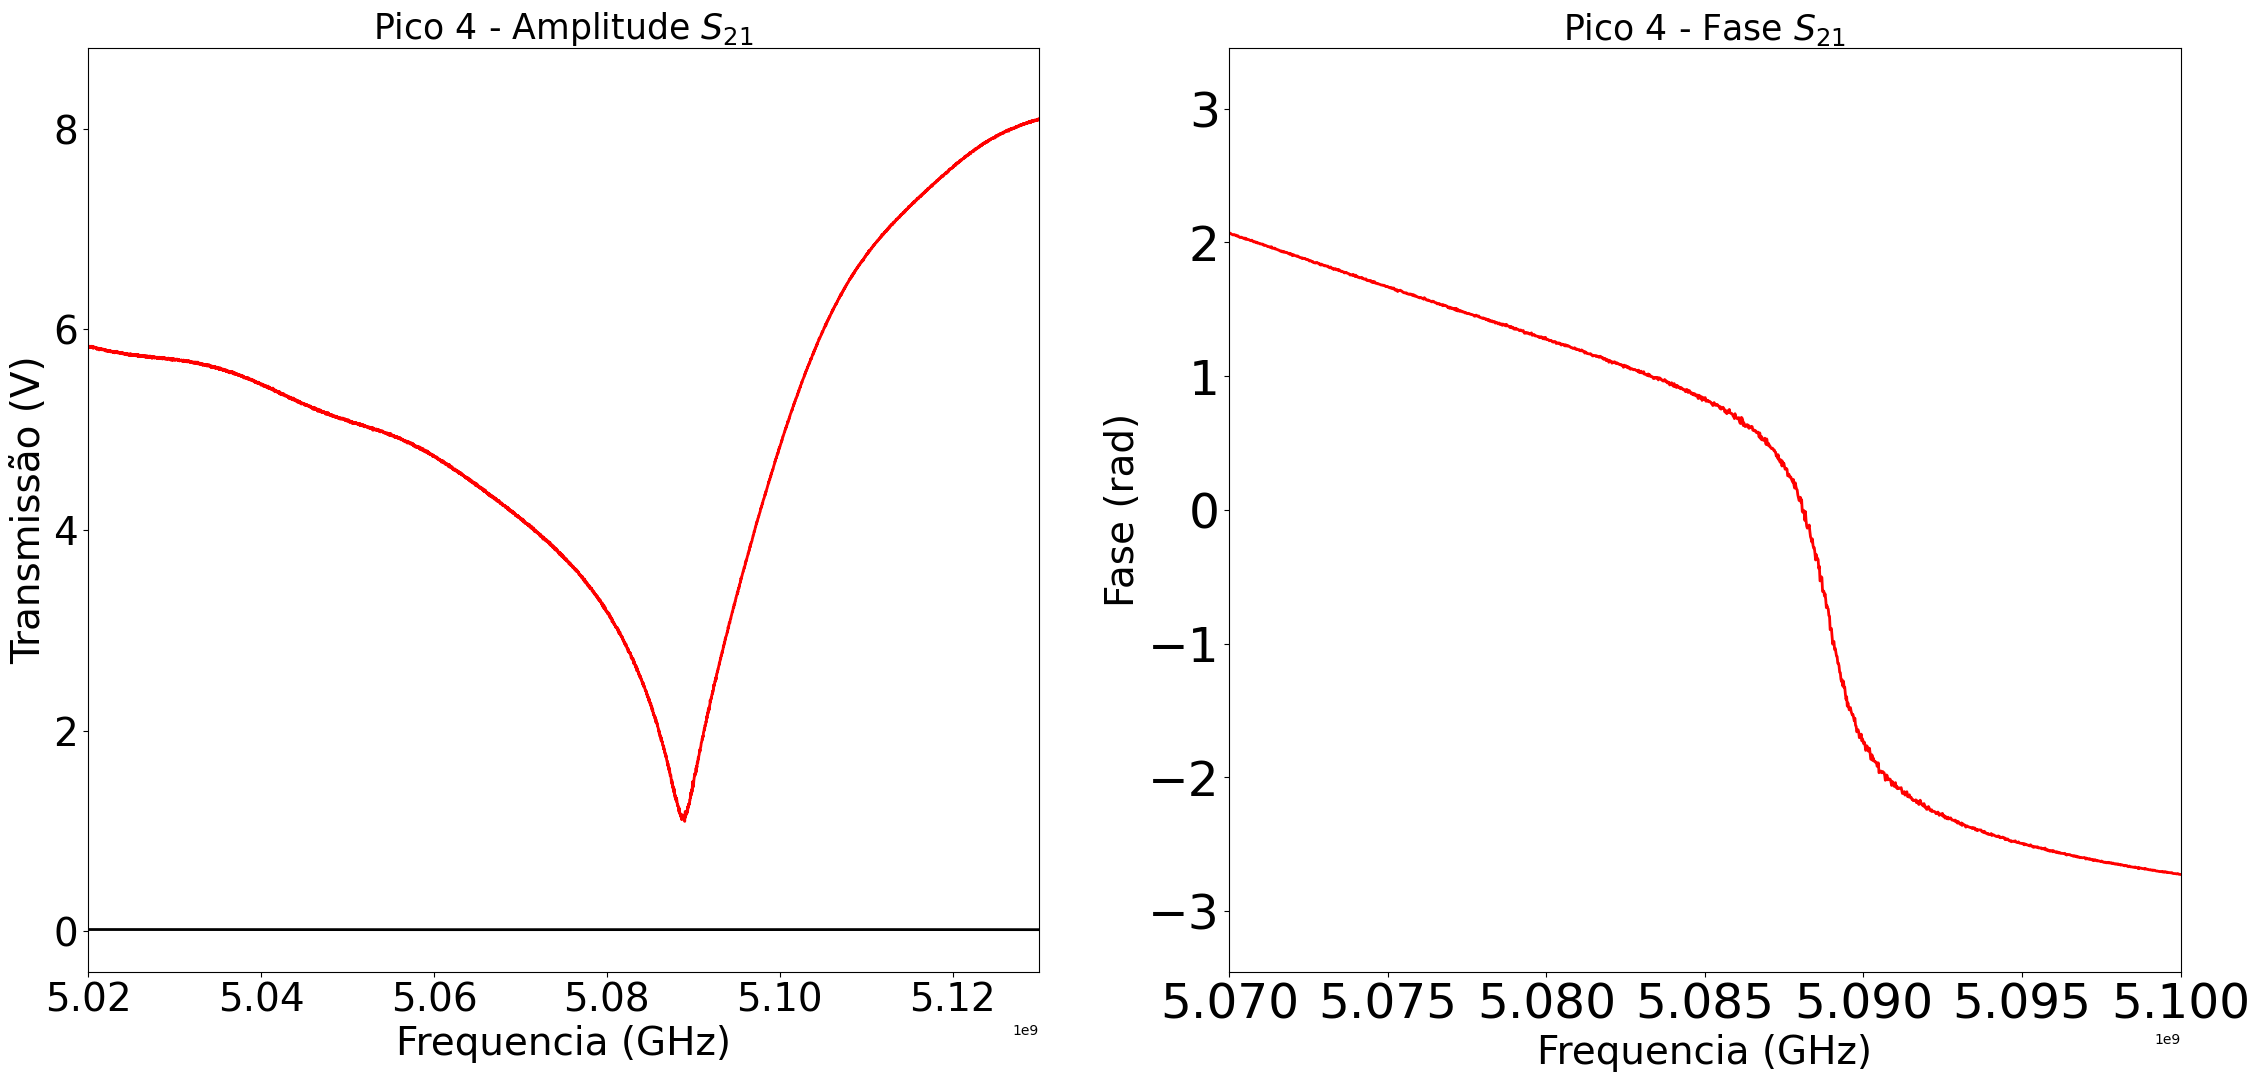

In [337]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p4, S21_p4_l_norm, linewidth=2, color='red')
ax[0].plot(S21_freq_p4, fundo_amp_span2GHz_l_fit(S21_freq_p4), linewidth=2, color='black')
ax[0].set_title("Pico 4 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (V)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(5.02e9,5.13e9)

ax[1].plot(S21_freq_p4, fase_p4_l_fit, linewidth=2, color='red')
#ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz_l+1010, linewidth=2, color='black')
ax[1].set_title("Pico 4 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (rad)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(5.07e9,5.10e9)
#ax[1].set_ylim(-3,3)

In [338]:
#Re/Im Fit e Rotação dos dados
# Method to calculate the center and radius of points in a circuference
from scipy      import  odr

# Import Data
X0 = S21_freq_p4[2550:5050]
Y0 = S21_p4_l_norm[2550:5050]*(exp(1j*fase_p4_l_fit[2550:5050]))* (exp(1j*np.pi))

x = Y0.real
y = Y0.imag

x_m = mean(x)
y_m = mean(y)

def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return sqrt((x-xc)**2 + (y-yc)**2)

x_m = mean(x)
y_m = mean(y)


# method_3 = "odr"

def f_3(beta, x):
    """ implicit definition of the circle """
    return (x[0]-beta[0])**2 + (x[1]-beta[1])**2 -beta[2]**2

# initial guess for parameters
R_m = calc_R(x_m, y_m).mean()
beta0 = [ x_m, y_m, R_m]

d = sqrt((x-x_m)**2+(y-y_m)**2)
error = R_m/sqrt(mean((d-R_m)**2))
# print(error)


# for implicit function :
#       data.x contains both coordinates of the points (data.x = [x, y])
#       data.y is the dimensionality of the response
lsc_data  = odr.Data(row_stack([x, y]),y=1)#,we=1/error,wd=error)
lsc_model = odr.Model(f_3, implicit=True)
lsc_odr   = odr.ODR(lsc_data, lsc_model, beta0)
lsc_out   = lsc_odr.run()

xc_3, yc_3, R_3 = lsc_out.beta
Ri_3 = calc_R(xc_3, yc_3)
residu_3 = sum((Ri_3 - R_3)**2)
lsc_out.beta

array([ 1.64762537, -0.67591219,  3.16588557])

1.6476253730296138 -0.6759121857425615 3.1658855707907008
-0.38929766379807096


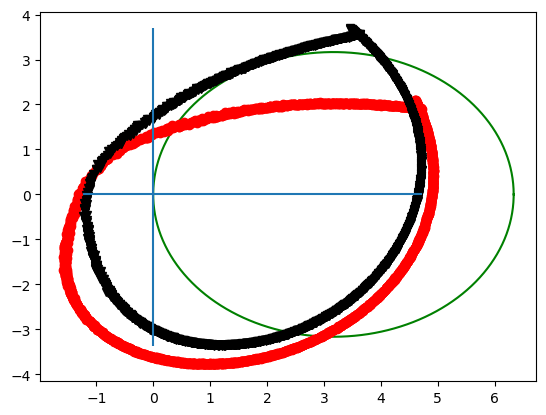

In [339]:
x0 = lsc_out.beta[0]
y0 = lsc_out.beta[1]
r0 = lsc_out.beta[2]


a = linspace(0,2*pi,1000)
x = r0 + r0 *cos(a)
y =  r0 *sin(a)
print(x0,y0,r0)

plt.plot(x,y,'g-')
plt.plot(Y0.real,Y0.imag,'ro')
Angle = arctan2(y0,x0)
print(Angle)
Y1=(Y0-complex(x0,y0))*exp(-1j*Angle)+sqrt(x0**2+y0**2)
#Y1=(Y0)*exp(1j*Angle)

plt.plot(Y1.real,Y1.imag,'kv')
#plt.plot(Fit.real,Fit.imag,'go')
plt.hlines(0,min(Y1.real),max(Y1.real))
plt.vlines(0,min(Y1.imag),max(Y1.imag))

(5085000000.0, 5092000000.0)

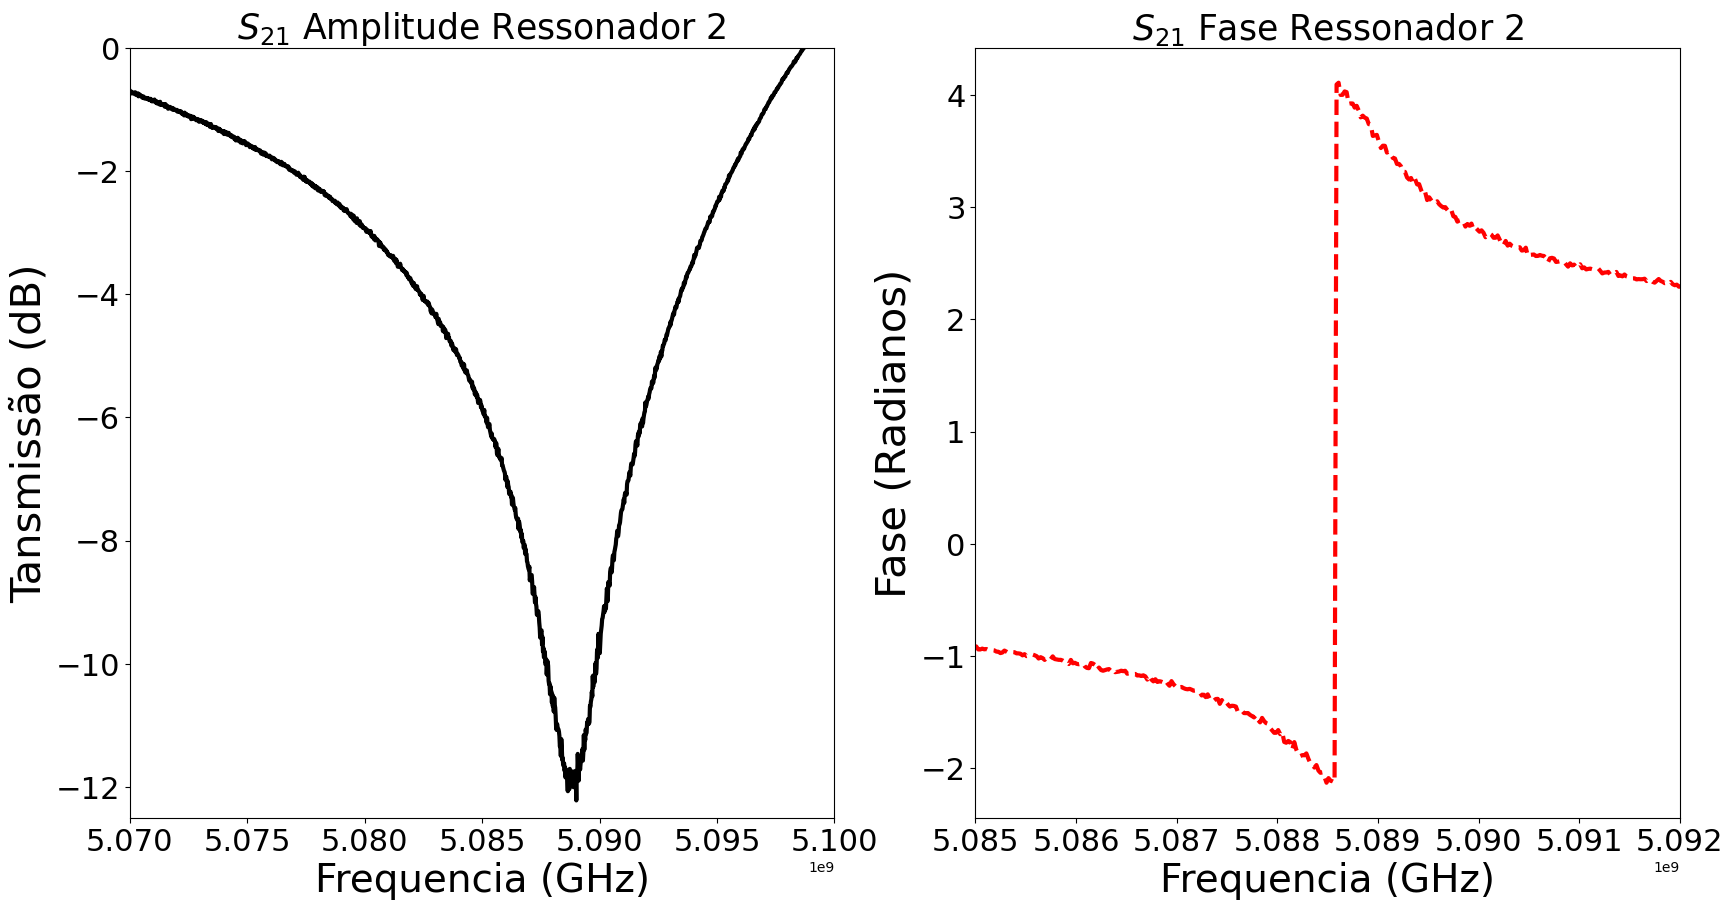

In [340]:
fig, ax = plt.subplots(1, 2, sharex=False, figsize=(20,10))
ax[0].plot(S21_freq_p4[2550:5050],(20*log10(abs(Y1)))-13,'k-', linewidth=3)
ax[0].set_title("$S_{21}$ Amplitude Ressonador 2", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Tansmissão (dB)", fontsize=30)
ax[0].tick_params(axis='both', which='major', labelsize=22)
ax[0].set_xlim(5.07e9,5.1e9)
ax[0].set_ylim(-12.5,0)

ax[1].plot(S21_freq_p4[2550:5050],angle(Y1)+1,'r--', linewidth=3)
ax[1].set_title("$S_{21}$ Fase Ressonador 2", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (Radianos)", fontsize=30)
ax[1].tick_params(axis='both', which='major', labelsize=22)
ax[1].set_xlim(5.085e9,5.092e9)
#ax[1].set_ylim(-2,2)

# Pico 5 - 5,9 GHz (DESCARTADO)

In [ ]:
S21_freq_p5, S21_p5, fase_p5 = ImportS2P("C:/Users/molin/medidas mK/(sample2) Medidas mK CHIP1 2024_06_26/S21_span5.8_6GHz_-5dBm.csv"\
                                       ,Delimiter = " ", Cols = (0,1,2), Skip_head=1)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p5, S21_p5, linewidth=2, color='red')
#ax[0].plot(fundo_freq_span18GHz, fundo_amp_span18GHz, linewidth=2, color='black')
ax[0].set_title("Pico 5 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (dB)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
#ax[0].set_xlim(2.95e9,3.05e9)

ax[1].plot(S21_freq_p5, fase_p5, linewidth=2, color='red')
#ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz, linewidth=2, color='black')
ax[1].set_title("Pico 5 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (Degree)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(5.88e9,5.92e9)

# Pico 6 - 8 GHz (DESCARTADO)

In [ ]:
S21_freq_p6, S21_p6, fase_p6 = ImportS2P("C:/Users/molin/medidas mK/(sample2) Medidas mK CHIP1 2024_06_26/S21_span7.85_8.1GHz_-5dBm.csv"\
                                       ,Delimiter = " ", Cols = (0,1,2), Skip_head=1)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p6, S21_p6, linewidth=2, color='red')
#ax[0].plot(fundo_freq_span18GHz, fundo_amp_span18GHz, linewidth=2, color='black')
ax[0].set_title("Pico 6 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (dB)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
#ax[0].set_xlim(2.95e9,3.05e9)

ax[1].plot(S21_freq_p6, fase_p6, linewidth=2, color='red')
#ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz, linewidth=2, color='black')
ax[1].set_title("Pico 6 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (Degree)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
#ax[1].set_xlim(5.88e9,5.92e9)

# Pico 7 - 9GHz

In [ ]:
S21_freq_p7, S21_p7, fase_p7 = ImportS2P("C:/Users/molin/medidas mK/(sample2) Medidas mK CHIP1 2024_06_26/S21_span8.9_9GHz_-5dBm.csv"\
                                       ,Delimiter = " ", Cols = (0,1,2), Skip_head=1)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p7, S21_p7, linewidth=2, color='red')
ax[0].plot(fundo_freq_span6GHz, fundo_amp_span6GHz, linewidth=2, color='black')
ax[0].set_title("Pico 7 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (dB)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(8.93e9,8.99e9)

ax[1].plot(S21_freq_p7, fase_p7, linewidth=2, color='red')
ax[1].plot(fundo_freq_span6GHz, fundo_fase_span6GHz, linewidth=2, color='black')
ax[1].set_title("Pico 7 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (Degree)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(8.93e9,8.99e9)

In [ ]:
#dB to Volts
log20=10*log10(20)
S21_p7_l=pow(10,(S21_p7-log20)/20)
fundo_amp_span6GHz_l=pow(10,(fundo_amp_span6GHz-log20)/20)

#Unwrap Phase
fase_p7_l=unwrap(radians(fase_p7))
fundo_fase_span6GHz_l=unwrap(radians(fundo_fase_span6GHz))

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p7, S21_p7_l, linewidth=2, color='red')
ax[0].plot(fundo_freq_span6GHz, fundo_amp_span6GHz_l, linewidth=2, color='black')
ax[0].set_title("Pico 7 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (V)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(8.93e9,8.99e9)

ax[1].plot(S21_freq_p7, fase_p7_l, linewidth=2, color='red')
ax[1].plot(fundo_freq_span6GHz, fundo_fase_span6GHz_l+2480, linewidth=2, color='black')
ax[1].set_title("Pico 7 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (rad)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(8.93e9,8.99e9)
ax[1].set_ylim(-100,0)

In [ ]:
#interpolação
fundo_amp_span6GHz_l_fit=interp1d(fundo_freq_span6GHz,fundo_amp_span6GHz_l, kind='cubic')
fundo_fase_span6GHz_l_fit=interp1d(fundo_freq_span6GHz,fundo_fase_span6GHz_l, kind='cubic')

In [ ]:
fase_p7_l_fit=wrap1(fundo_fase_span6GHz_l_fit(S21_freq_p7)-fase_p7_l)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p7, S21_p7_l, linewidth=2, color='red')
ax[0].plot(S21_freq_p7, fundo_amp_span6GHz_l_fit(S21_freq_p7), linewidth=2, color='black')
ax[0].set_title("Pico 7 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (V)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(8.93e9,8.99e9)

ax[1].plot(S21_freq_p7, fase_p7_l_fit, linewidth=2, color='red')
#ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz_l+1050, linewidth=2, color='black')
ax[1].set_title("Pico 7 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (rad)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(8.93e9,8.99e9)
#ax[1].set_ylim(-5,5)

In [ ]:
#NORMALIZAR DADOS
S21_p7_l_norm=S21_p7_l/fundo_amp_span6GHz_l_fit(S21_freq_p7)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(27,12))

ax[0].plot(S21_freq_p7, S21_p7_l_norm, linewidth=2, color='red')
ax[0].plot(S21_freq_p7, fundo_amp_span6GHz_l_fit(S21_freq_p7), linewidth=2, color='black')
ax[0].set_title("Pico 7 - Amplitude $S_{21}$", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (V)", fontsize=28)
ax[0].tick_params(axis='both', which='major', labelsize=28)
ax[0].set_xlim(8.93e9,8.99e9)

ax[1].plot(S21_freq_p7, fase_p7_l_fit, linewidth=2, color='red')
#ax[1].plot(fundo_freq_span18GHz, fundo_fase_span18GHz_l+1010, linewidth=2, color='black')
ax[1].set_title("Pico 7 - Fase $S_{21}$", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (rad)", fontsize=28)
ax[1].tick_params(axis='both', which='major', labelsize=35)
ax[1].set_xlim(8.93e9,8.99e9)
#ax[1].set_ylim(-3,3)

In [ ]:
len(S21_freq_p7)

In [ ]:
#Re/Im Fit e Rotação dos dados
# Method to calculate the center and radius of points in a circuference
from scipy      import  odr

# Import Data
X0 = S21_freq_p7[4200:8600]
Y0 = S21_p7_l_norm[4200:8600]*(exp(1j*fase_p7_l_fit[4200:8600]))* (exp(1j*np.pi))

x = Y0.real
y = Y0.imag

x_m = mean(x)
y_m = mean(y)

def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return sqrt((x-xc)**2 + (y-yc)**2)

x_m = mean(x)
y_m = mean(y)


# method_3 = "odr"

def f_3(beta, x):
    """ implicit definition of the circle """
    return (x[0]-beta[0])**2 + (x[1]-beta[1])**2 -beta[2]**2

# initial guess for parameters
R_m = calc_R(x_m, y_m).mean()
beta0 = [ x_m, y_m, R_m]

d = sqrt((x-x_m)**2+(y-y_m)**2)
error = R_m/sqrt(mean((d-R_m)**2))
# print(error)


# for implicit function :
#       data.x contains both coordinates of the points (data.x = [x, y])
#       data.y is the dimensionality of the response
lsc_data  = odr.Data(row_stack([x, y]),y=1)#,we=1/error,wd=error)
lsc_model = odr.Model(f_3, implicit=True)
lsc_odr   = odr.ODR(lsc_data, lsc_model, beta0)
lsc_out   = lsc_odr.run()

xc_3, yc_3, R_3 = lsc_out.beta
Ri_3 = calc_R(xc_3, yc_3)
residu_3 = sum((Ri_3 - R_3)**2)
lsc_out.beta

In [ ]:
x0 = lsc_out.beta[0]
y0 = lsc_out.beta[1]
r0 = lsc_out.beta[2]


a = linspace(0,2*pi,1000)
x = r0 + r0 *cos(a)
y =  r0 *sin(a)
print(x0,y0,r0)

plt.plot(x,y,'g-')
plt.plot(Y0.real,Y0.imag,'ro')
Angle = arctan2(y0,x0)
print(Angle)
Y1=(Y0-complex(x0,y0))*exp(-1j*Angle)+sqrt(x0**2+y0**2)
#Y1=(Y0)*exp(1j*Angle)

plt.plot(Y1.real,Y1.imag,'kv')
#plt.plot(Fit.real,Fit.imag,'go')
plt.hlines(0,min(Y1.real),max(Y1.real))
plt.vlines(0,min(Y1.imag),max(Y1.imag))

In [ ]:
fig, ax = plt.subplots(1, 2, sharex=False, figsize=(20,10))
ax[0].plot(S21_freq_p7[4200:8600],(20*log10(abs(Y1)))-19,'k-', linewidth=3)
#ax[0].set_xlim(8.955e9,8.957e9)
ax[0].set_title("$S_{21}$ Amplitude Ressonador 4", fontsize=25)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[0].set_ylabel(r"Transmissão (dB)", fontsize=30)
ax[0].tick_params(axis='both', which='major', labelsize=22)

ax[1].plot(S21_freq_p7[4200:8600],angle(Y1),'r--', linewidth=3)
ax[1].set_xlim(8.95e9,8.962e9)
ax[1].set_title("$S_{21}$ Fase Ressonador 4", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=28)
ax[1].set_ylabel(r"Fase (Radianos)", fontsize=30)
ax[1].tick_params(axis='both', which='major', labelsize=22)